#### Dataset: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#### There are four datasets:

    1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

    2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

    3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

    4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


#### Attribute Information:

#### Input variables:

#### bank client data:

    1 - age (numeric)

    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

    5 - default: has credit in default? (categorical: 'no','yes','unknown')

    6 - housing: has housing loan? (categorical: 'no','yes','unknown')

    7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:

    8 - contact: contact communication type (categorical: 'cellular','telephone')

    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:

    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

    14 - previous: number of contacts performed before this campaign and for this client (numeric)

    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes

    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

    17 - cons.price.idx: consumer price index - monthly indicator (numeric)

    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

    20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

_____________________________

In [2]:
# Importing required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
# Loading the dataset

data = pd.read_csv(r"C:\Users\karth\Desktop\ML_Task\data\bank-additional-full.csv",sep=';')
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

#### Step-1

Once the dataset and business needs, problems are given we need to generate Hypothesis.

#### Hypothesis Generation

Simply put, a hypothesis is a possible view or assertion of an analyst about the problem he or she is working upon. It may be true or may not be true.

##### Example:

#### Hypothesis Questions

1. Are retired people more likely to subscribe for term deposit?

This may be true as usually retired people prefer safe investments in the form of fixed deposits rather than risky investments

2. Do salaried people prefer it more than business owners or entrepreneurs?

This may be true as it is reasonable to think business people would prefer mostly to invest money bank into thier business rather than putting in banks

3. Are married people more likely to subscribe term deposit?

This may be true as married people often tend to ensure savings for their family

4. If you already have loans would you be less likely to subscribe term deposit?

5. Are younger customers more likely to subscribe term deposit compared with old customers?

#### Step-2

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.

    Problem definition (what do we want to solve)
    Variable Identification (what data do we have)
    Univariate Analysis (understanding each field in the dataset)
    Bi-variate Analysis (understanding the interactions between different fields and target)
    Missing values treatment (machine learning algorithms hates fields with missing data)
    Outlier treatment
    Variable transformation (Feature Engineering)
    Variable creation (Feature Engineering)

Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model.

### Exploratory Data Analysis

1. Brief look at the dataset
2. See the shape of the dataset
3. See the variables datatypes
4. Target Distribution
5. See the number of missing/null values
6. See the number of unique values in each variable

In [4]:
"""
Pandas describe() is used to view some basic statistical details like count, percentiles, mean, 
std, and maximum value of a data frame or a series of numeric values.
"""
## Descriptive Analysis

data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [5]:
data.describe().transpose() #using transpose function on describe function

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

#### Step-3 (Variable Identification)

First, identify Predictor (Input) and Target (output) variables. 

Next, identify the data type and category of the variables.

Variables are of two types — Numerical and Categorical. 

They can be further classified as follows:

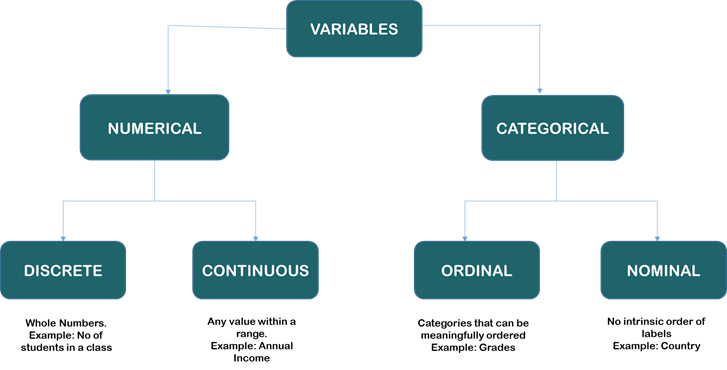

In [6]:
from IPython.display import Image
Image(filename=r'C:\Users\karth\Desktop\ML_Task\1.png')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
"""
skew(array, axis=0, bias=True) function calculates the skewness of the data set. 
skewness = 0 : normally distributed. 
skewness > 0 : more weight in the left tail of the distribution. 
skewness < 0 : more weight in the right tail of the distribution.
"""

data.skew()  # will show you the skewness of each column numerical

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [9]:
data.dtypes #lets have a look at data types of attributes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
# Finding the shape of dataset

print(f"Data contains {data.shape[0]} samples/rows and {data.shape[1]} features/variables/columns")

Data contains 41188 samples/rows and 21 features/variables/columns


In [11]:
# We are storing 'y' feature into TARGET_COL variable

TARGET_COL = 'y'

# We are storing remaining all features apart from target_col into features variable

features = [c for c in data.columns if c not in [TARGET_COL]]

print(f"The dataset contains {len(features)} input features")

The dataset contains 20 input features


#### Step-4 (Non-Graphical Univariate Analysis)

##### To get the count of unique values

The value_counts() method in Pandas returns a series containing the counts of all the unique values in a column.

##### To get the list & number of unique values

The unique() function of pandas returns the list of unique values in the dataset.

#### Preliminary Analysis

In [12]:
# Distribution of the target feature: 'y' , has the customer subscribed to term deposit (binary: 'yes','no')

"""The value_counts() method in Pandas returns a series containing the counts of all the unique values in a column."""

data[TARGET_COL].value_counts(normalize = True) # normalize = True , will return percentage according to frequency

no     0.887346
yes    0.112654
Name: y, dtype: float64

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target Distribution')

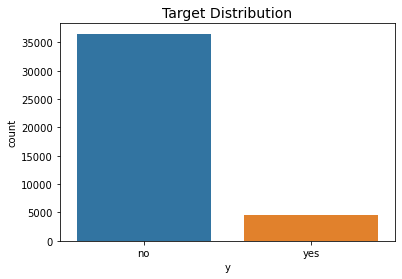

In [13]:
# Let's use countplot() function from seaborn library to visualize target variable 'y'

# Univariate Analysis - Categorical Variable - countplot() function
sns.countplot(data[TARGET_COL])
plt.title("Target Distribution",fontsize=14)

#### We can see that dataset is highly imbalanced most of them are 'no'

In [14]:
# Checking unique values in each variable

"""The unique() function of pandas returns the list of unique values in the dataset."""

data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

##### The features 'age' , 'duration' , 'campaign' , 'pdays' , 'euribor3m' contain a lot of unique values as they are continuous variables

In [15]:
# Checking for null values

data[features].isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

<AxesSubplot:>

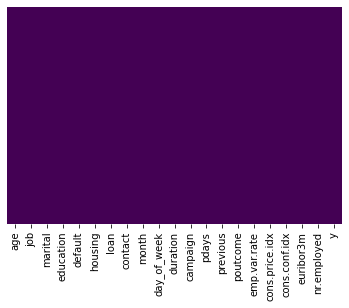

In [16]:
# Visualiation of missing value in heat map

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### There are no null values in the dataset

In [17]:
#Checking percentage of null values for each feature/column

null_values_per_variable = 100 * (data.isnull().sum()/data.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending = False)

#### Data imputation: 

**https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779**

**https://towardsdatascience.com/a-comprehensive-guide-to-data-imputation-e82eadc22609**

In [18]:
# Removal of duplicate rows

print(f"Before removing duplicate rows {data.shape[0]} and columns {data.shape[1]}")

data = data.drop_duplicates()

print(f"\nAfter removing duplicate rows {data.shape[0]} and columns {data.shape[1]}")

Before removing duplicate rows 41188 and columns 21

After removing duplicate rows 41176 and columns 21


#### Step-5 (Filtering based on Conditions)

Datasets can be filtered using different conditions, which can be implemented using logical operators in python. For example, == (double equal to), ≤ (less than or equal to), ≥(greater than or equal to), etc.

#### Step-6 (Data Type Conversion)

Pandas astype() method is used to change the data type of a column. 

to_datetime() method is used to change, particularly to DateTime type.

### Analyzing each variable and their relationships

##### For each feature type we will perform two types of analysis

##### Univariate: Analyze one feature at a time

##### Bivariate: Analyze two features at a time (Relation between each input feature and target feature 'y')

#### Step-7 (Graphical Univariate Analysis)

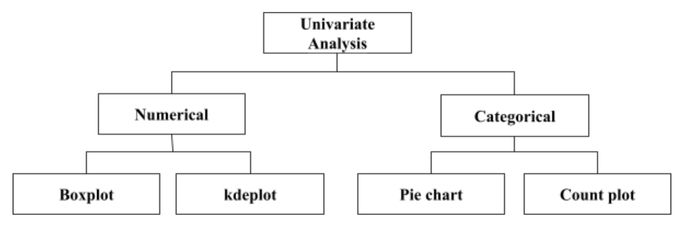

In [19]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\200.jpg')

#### Box Plots:

A Box Plot is the visual representation of the statistical summary of a given data set.

The Summary includes:

    Minimum
    First Quartile
    Median (Second Quartile)
    Third Quartile
    Maximum

It is also used to identify the outliers in the dataset.

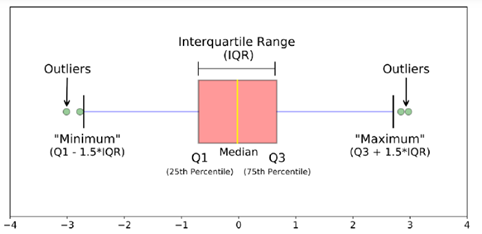

In [20]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\3.png')

#### KDE Plot (Density Plot)

    KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. 
    It depicts the probability density at different values in a continuous variable. 
    We can also plot a single graph for multiple samples which helps in more efficient data visualization.

#### Pie chart

    Pie charts are generally used to show percentage or proportional data and usually the percentage represented by each category is provided next to the corresponding slice of pie. 
    Pie charts are good for displaying data for around 6 categories or fewer.

#### Count Plots

    A count plot can be thought of as a histogram across a categorical, instead of numeric, variable. It is used to find the frequency of each category.


#### Histogram:

    Histograms are one of the most common graphs used to display numeric data. 
    Histograms two important things we can learn from a histogram:

    distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right)
    To identify outliers — Extremely low or high values that do not fall near any other data points.

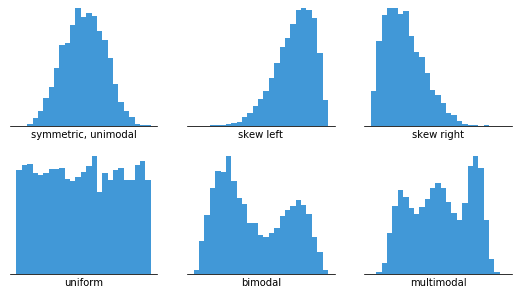

In [21]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\2.png')

#### Step-8 (Graphical Bivariate Analysis)

    Bi-variate Analysis finds out the relationship between two variables. 
    Here, we look for association and dissociation between variables at a pre-defined significance level. 
    We can perform bi-variate analysis for any combination of categorical and continuous variables. 
    The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. 
            Categorical & Categorical - countplot()
            Categorical & Continuous - One useful way to explore the relationship between a continuous and a categorical variable is with a set of side by side box plots, one for each of the categories. Similarities and differences between the category levels can be seen in the length and position of the boxes and whiskers.
            OR
            Histogram
            OR
            KDE plot
            Continuous & Continuous - Scatterplot, heatmap
    Different methods are used to tackle these combinations during the analysis process.

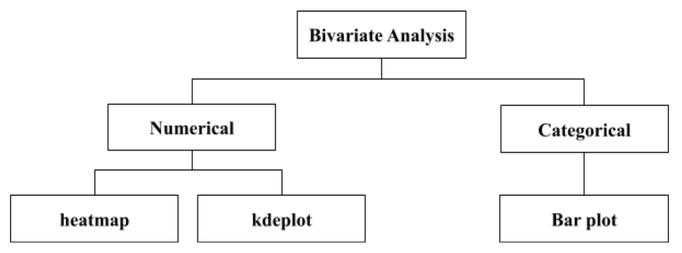

In [22]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\100.jpg')

#### heatmap

    heatmap is used to find the correlation 
    A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. 
    The seaborn python package allows the creation of annotated heatmaps.

#### Bar plot

    Histograms are used to show distributions of variables while bar charts are used to compare variables. Histograms plot quantitative data with ranges of the data grouped into bins or intervals while bar charts plot categorical data.

In [23]:
# Displaying column names

print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


##### Segregating catogorical and numerical variables

In [24]:
#cat_cols = data.loc[:,data.dtypes==np.object] # getting catogorical columns from dataframe like this
#cat_cols
#------------------------------------------------------OR-------------------------------------------------------------
"""
print("Continuous Variables","\n")
num_cols = data.describe().columns
print(num_cols)
"""
"""
print("Categorical Variables","\n")
cat_cols = data.describe(include=[object]).columns
print(cat_cols)
"""
#------------------------------------------------------OR-------------------------------------------------------------

cat_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week', 'poutcome']

In [25]:
num_cols = [c for c in features if c not in cat_cols] # getting numeric columns from dataframe like this
print(num_cols)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


#### Univariate Analysis of categorical features - countplot

A way of looking at the counts of each of the catogories is countplots.

These are similar to barplots with the width of the bars representing the count of the category in the variable

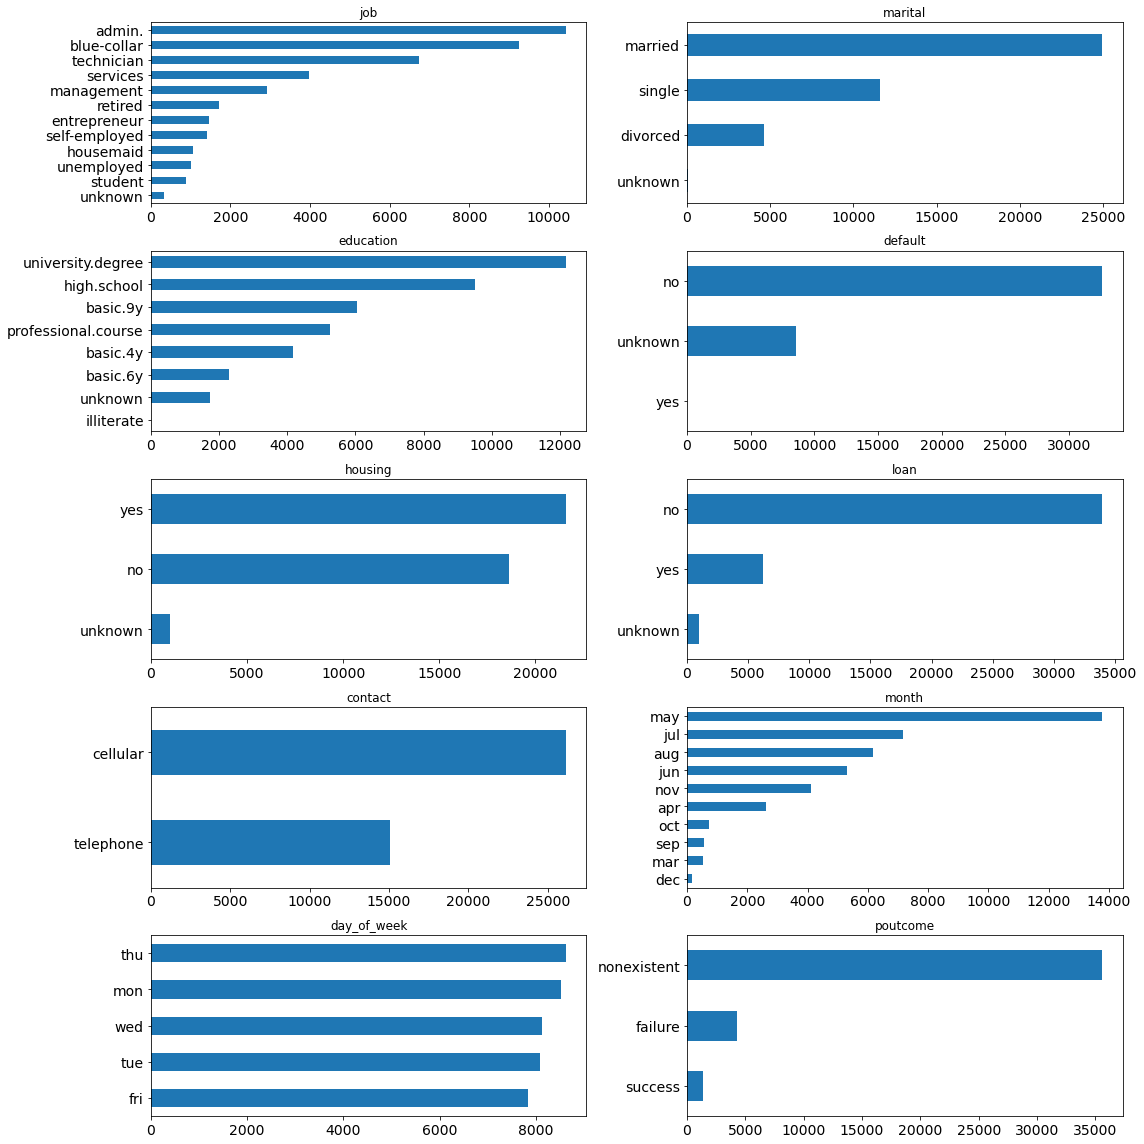

In [26]:
fig, axes = plt.subplots(5, 2, figsize=(16, 16)) #total 10 subplots that's why 5*2
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(data[cat_cols]):
    _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
_ = plt.tight_layout()

#### **Univariate Analysis - Pie Charts.**

Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

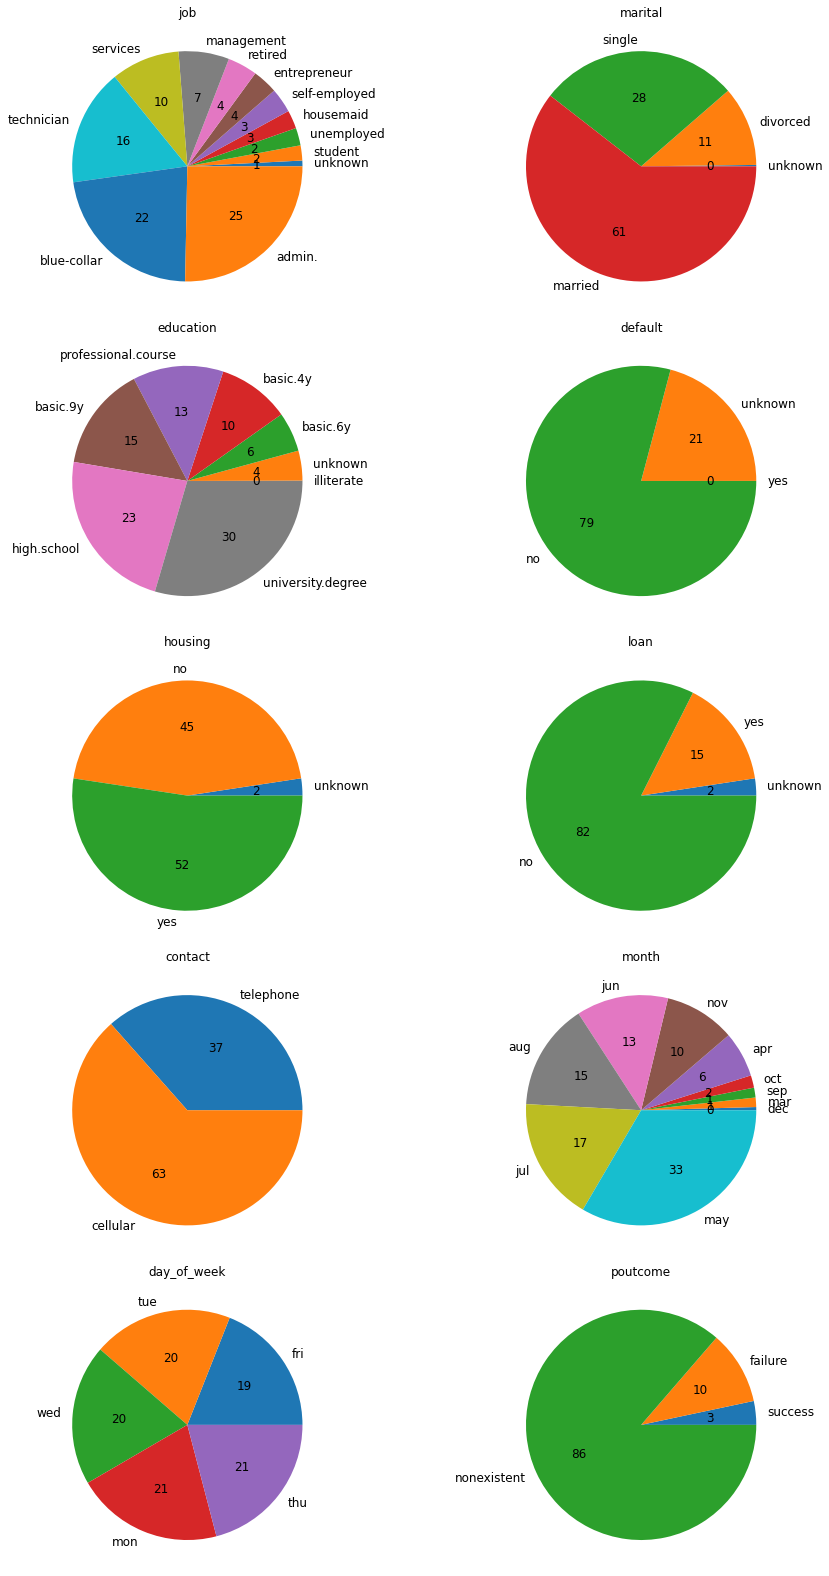

In [27]:
fig, axes = plt.subplots(5, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(data[cat_cols]):
    _ = data[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

#### Bivariate Analysis: Relationship between catogorical features with target

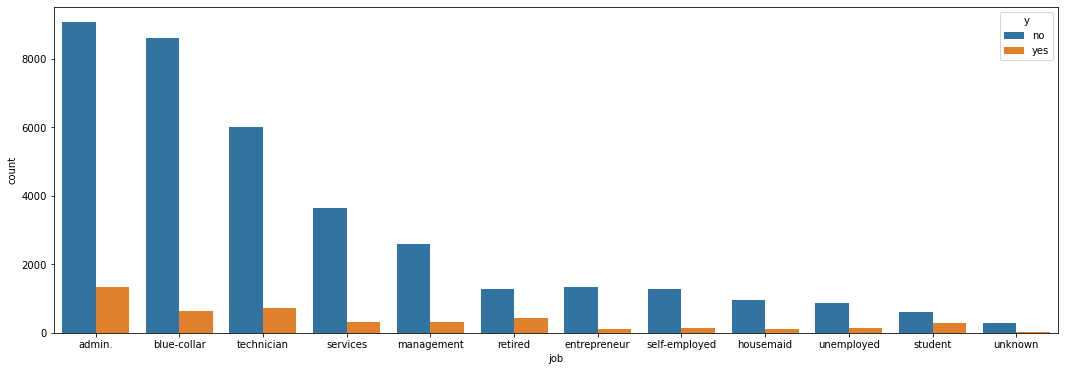

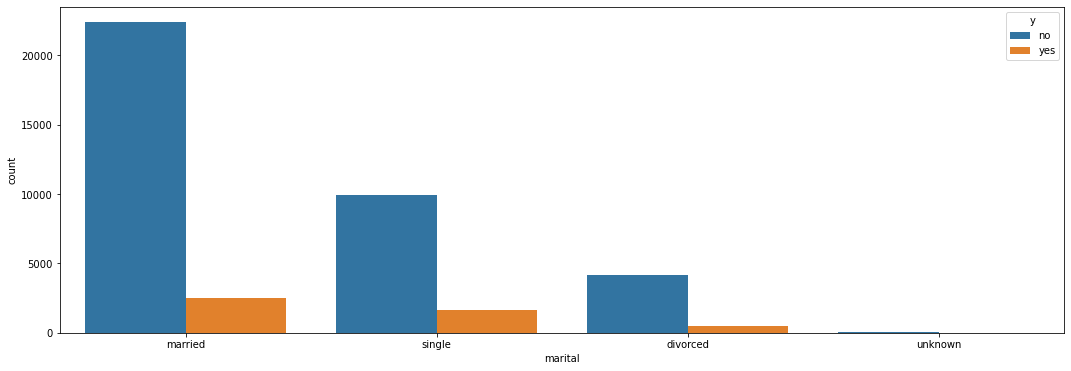

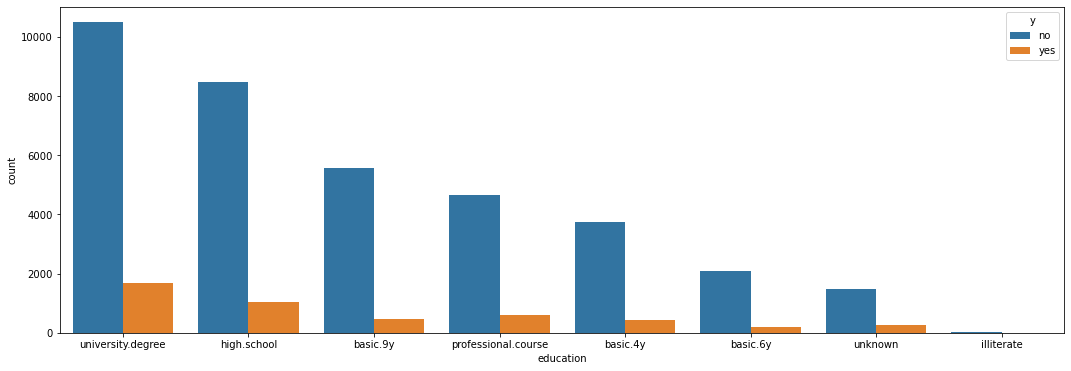

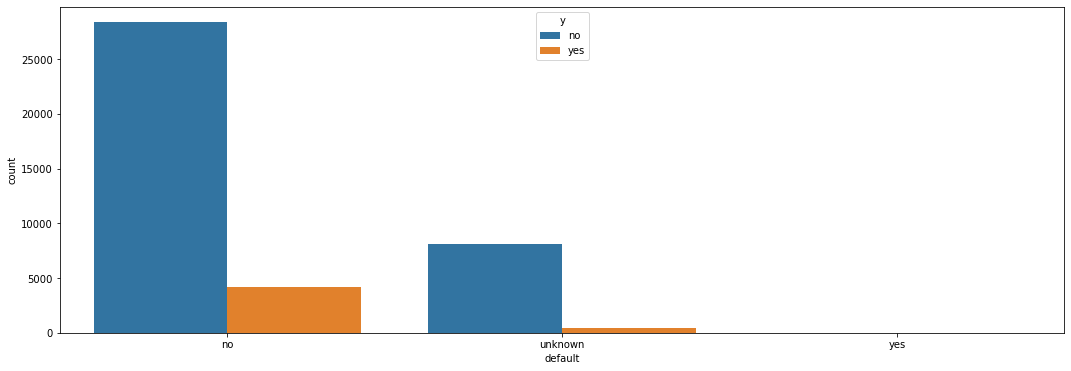

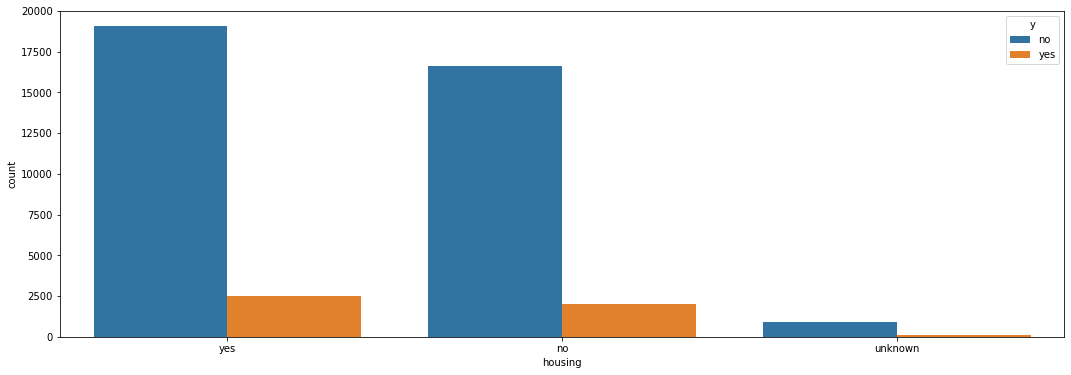

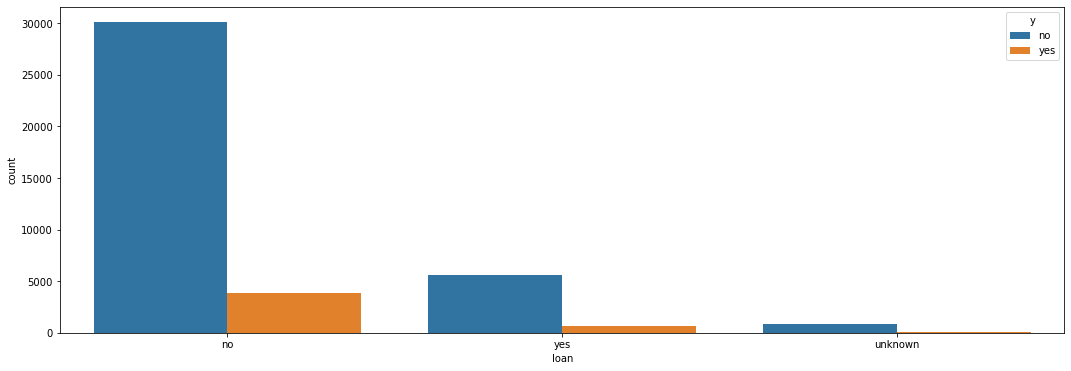

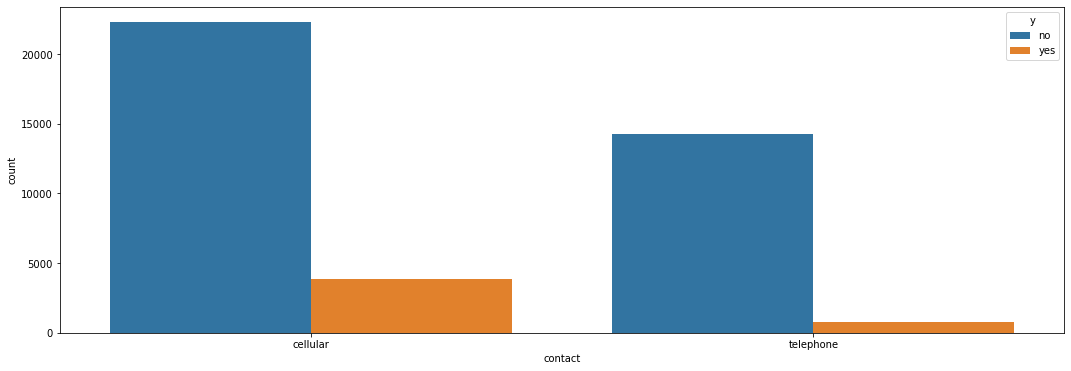

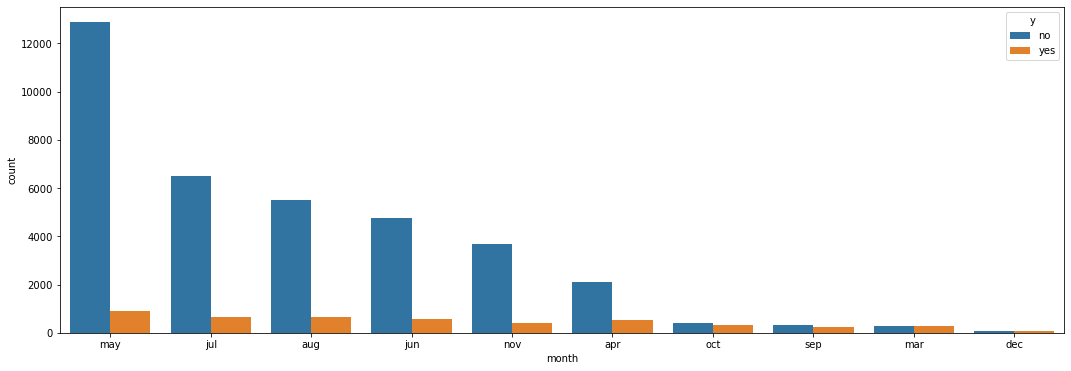

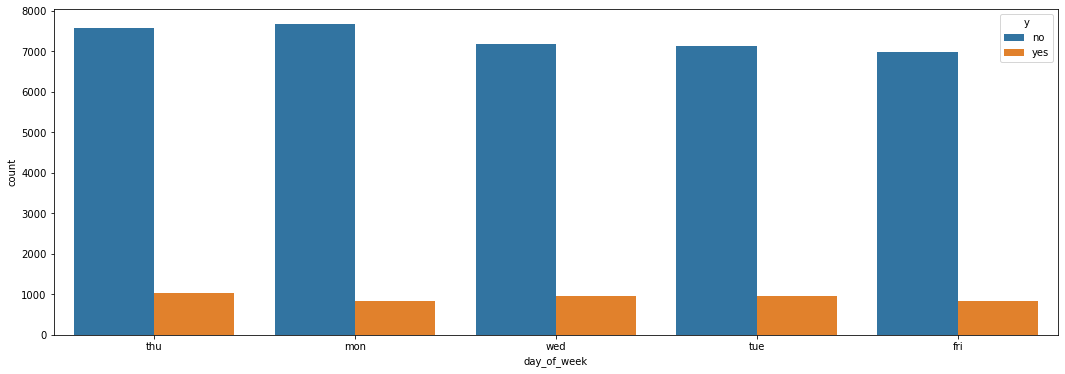

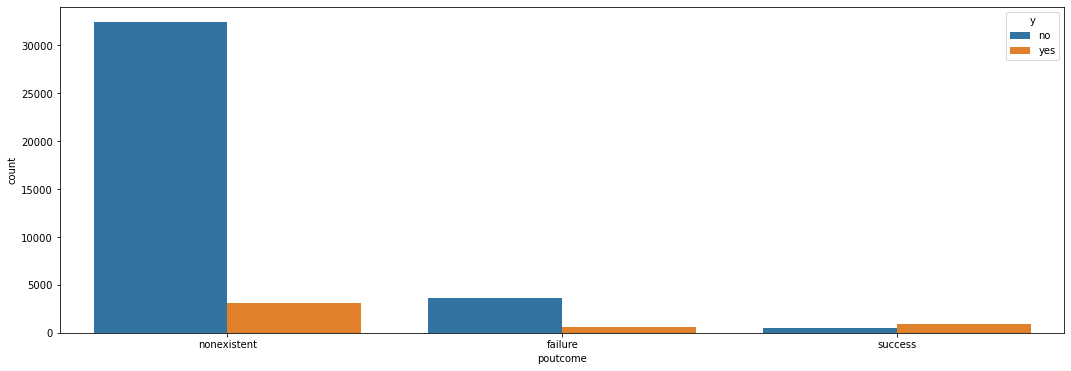

In [28]:
for c in cat_cols:
    plt.figure(figsize = (18,6)) # this creates a new figure on which our plot will appear
    sns.countplot(x = c, hue = 'y', data = data, order = data[c].value_counts().index) # individual bars sorted according to frequency and then plotted

In [29]:
#By using above figures we need to make some conclusions for our hypothesis questions so for that we can
#assume which features are important with respect to target variable

###### JOBS WITH SUBSCRIBERS ######

# Lets copy our data into another variable so that original data remains same

data1 = data.copy()

data1['y'] = data1['y'].replace(['no','yes'],[0,1]) # need to do below mathematical operations
data1.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

In [30]:
# Checking total amount of customers are in job per occupation

total_people_in_job = data1.groupby('job').y.count().values
print(total_people_in_job)

[10419  9253  1456  1060  2924  1718  1421  3967   875  6739  1014   330]


In [31]:
# Checking number of customers who subscribed to the term deposit grouped by occupation

total_subscribers = data1.groupby('job').y.sum().values
print(total_subscribers)

[1351  638  124  106  328  434  149  323  275  730  144   37]


In [32]:
# Proportion of clients who subscribed to the term deposit grouped by occupation

proportion_subscribed = (round(data1.groupby('job').y.sum()/data1.groupby('job').y.count(),3)*100).values
print(proportion_subscribed)

[13.   6.9  8.5 10.  11.2 25.3 10.5  8.1 31.4 10.8 14.2 11.2]


In [33]:
# Creating a dataframe to get better conclusions

# First let's create a column named as JOB with all unique job names

jobs = sorted(data1.job.unique()) # list of all jobs

jobs_with_subscribers = pd.DataFrame({'Job': jobs, 
                                      'Total Subscribers':total_subscribers,
                                      'Total People in Job': total_people_in_job,
                                      'Proportion of Subscribers': proportion_subscribed})

jobs_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

Job  Total Subscribers  Total People in Job  \
8         student                275                  875   
5         retired                434                 1718   
10     unemployed                144                 1014   
0          admin.               1351                10419   
4      management                328                 2924   
11        unknown                 37                  330   
9      technician                730                 6739   
6   self-employed                149                 1421   
3       housemaid                106                 1060   
2    entrepreneur                124                 1456   
7        services                323                 3967   
1     blue-collar                638                 9253   

    Proportion of Subscribers  
8                        31.4  
5                        25.3  
10                       14.2  
0                        13.0  
4                        11.2  
11                       11.2  
9                        10.8  
6                        10.5  
3                        10.0  
2                         8.5  
7                         8.1  
1                         6.9

**Observations:** Though the number of admin, blue collar, technician subscribers are more, we can also see that according to proportion, students and retired people are much more likely to subscribe to our term deposits!

#### Answering Hypothesis Questions:

**1.Are senior (retired) people more likely to subscribe for term deposits? (they may prefer safe investments)**

**Observation:** No. The number of subscriptions by retired people are less. But We can see a positive result of the marketing campaign on senior people i.e the proprtion of yes/no is more for retired folks. [See table above]

Similarly, it is also interesting to see a very positive effect of the marketing campaign on students.

**2.Do salaried people prefer it more than business owners who would invest money into their business rather than putting in bank?**

**Observation:** Yes. Salaried People (admin, service, technician, blue collar jobs etc. ) are much more interested than entrepreneurs and self employed people.

In [34]:
data1['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [35]:
# Above we saw how to make conclusions related to Job column and target column(subscribed or not)

# Now here we will see how to make conclusion related to marital column and target column(subscribed or not)

married_subscribers = data1[(data1.marital == 'married')].y.sum()
married_subscribers_prop = married_subscribers/len(data1[data1.marital == 'married'])

print("Number of married customers who subscribe:{}".format(married_subscribers))
print("\nMarried customers campaign success rate:{0:.0f}%".format(married_subscribers_prop*100))


single_subscribers = data1[(data1.marital == 'single') | (data1.marital == 'divorced')].y.sum()
single_subscribers_prop = single_subscribers/len(data1[(data1.marital=='single') | (data1.marital=='divorced')])

print("\nNumber of single&divorced customers who subscribe:{}".format(single_subscribers))
print("\nSingle customers campaign success rate:{0:.0f}%".format(single_subscribers_prop*100))

Number of married customers who subscribe:2531

Married customers campaign success rate:10%

Number of single&divorced customers who subscribe:2096

Single customers campaign success rate:13%


### OR

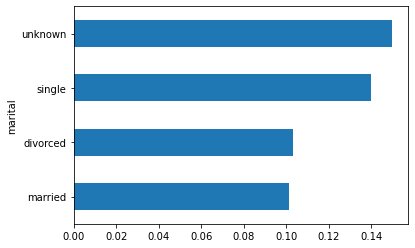

In [36]:
_ = data1.groupby('marital')[TARGET_COL].mean().sort_values().plot(kind = 'barh')

**Observations:** Even though we have more clients who are married subscribers, If we look according to proportions, we see that single clients responded to the campaign better.

#### Answering Hypothesis Questions:

**3.Are married people more likely to subscibe for term deposits? (They may prefer having savings for their children?)**

**Observation:** No, Proportion of single subscribers is more by 3%.

**4.If you already have loans, would you be less likely to subscibe to term deposits?**

**Observation:** People having personal loans subscribe less to the term deposits. The same is not true for people with home loans.

#### Univariate Analysis for continuous variables

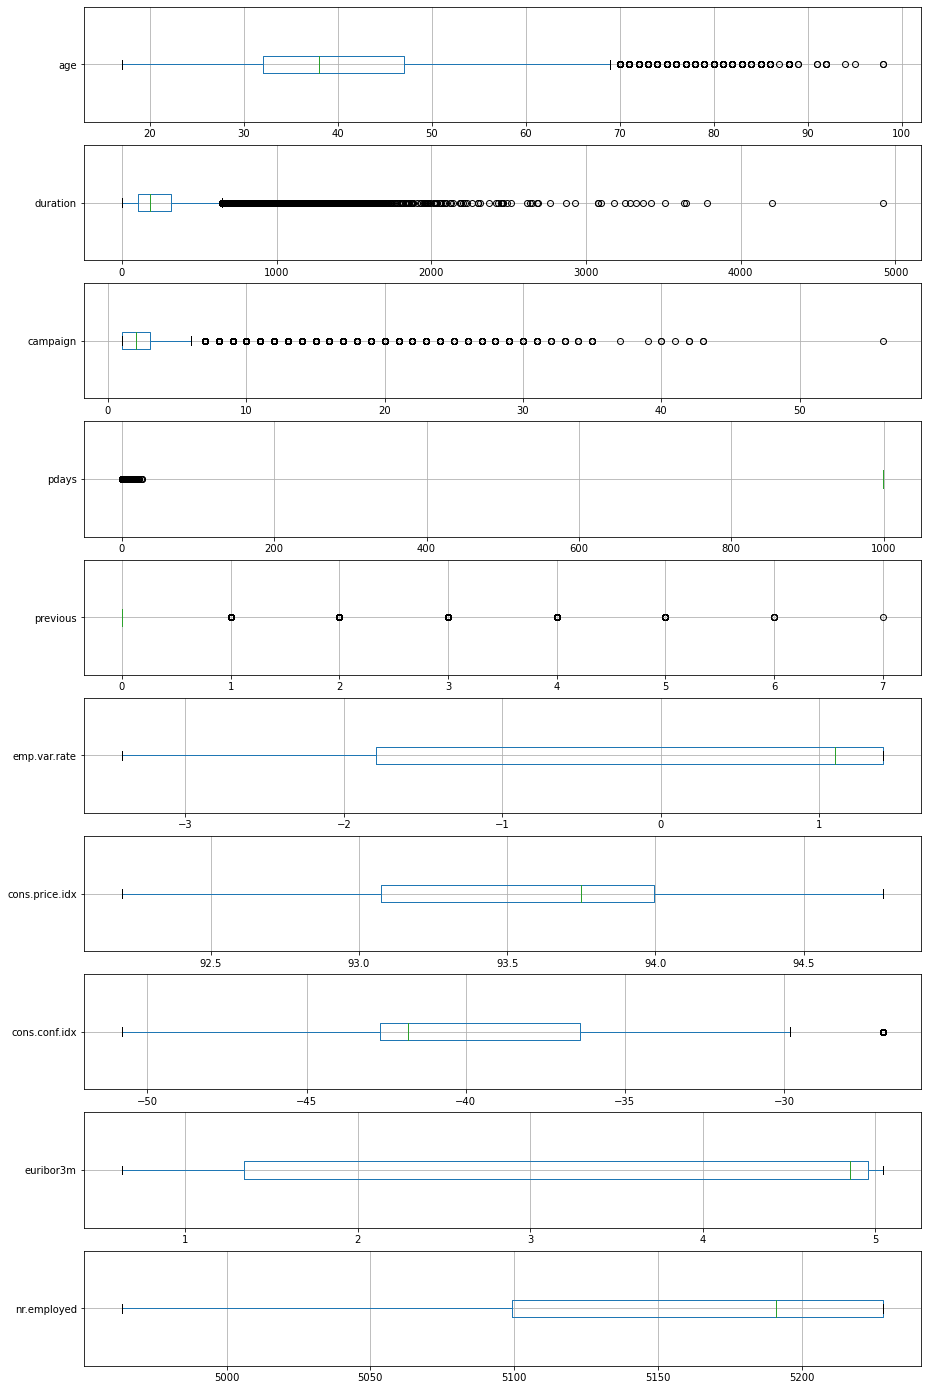

In [37]:
## Using Boxplots

fig, axes = plt.subplots(10,1, figsize=(15,25))
for i, c in enumerate(num_cols):
    _ = data[[c]].boxplot(ax=axes[i], vert=False)

### Outliers

#### Which Machine Learning Models Are Sensitive To Outliers?

    Naivye Bayes Classifier--- Not Sensitive To Outliers
    SVM-------- Not Sensitive To Outliers
    Linear Regression---------- Sensitive To Outliers
    Logistic Regression------- Sensitive To Outliers
    Decision Tree Regressor or Classifier---- Not Sensitive
    Ensemble(RF,XGboost,GB)------- Not Sensitive
    KNN--------------------------- Not Sensitive
    Kmeans------------------------ Sensitive
    Hierarichal------------------- Sensitive
    PCA-------------------------- Sensitive
    Neural Networks-------------- Sensitive

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

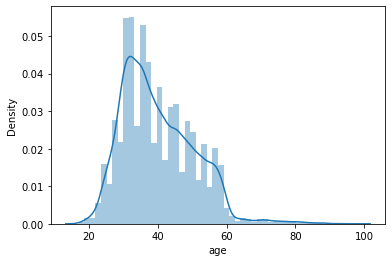

In [38]:
import seaborn as sns

sns.distplot(data['age']) #sns.distplot(data['age'].dropna())

#### Gaussian Distributed

Text(0, 0.5, 'y')

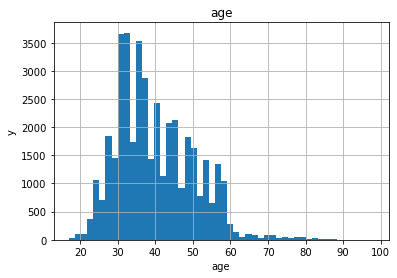

In [39]:
figure=data.age.hist(bins=50)
figure.set_title('age')
figure.set_xlabel('age')
figure.set_ylabel('y')

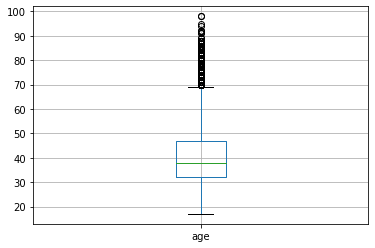

In [40]:
figure=data.boxplot(column="age")

In [41]:
data['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

#### If The Data Is Normally Distributed We use this

In [42]:
##### Assuming 'age' follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_boundary = data['age'].mean() + 3 * data['age'].std()
lower_boundary = data['age'].mean() - 3 * data['age'].std()
print(lower_boundary)
print(upper_boundary)
print(data['age'].mean())

8.76176066517472
71.2858398788315
40.02380027200311


#### If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'y')

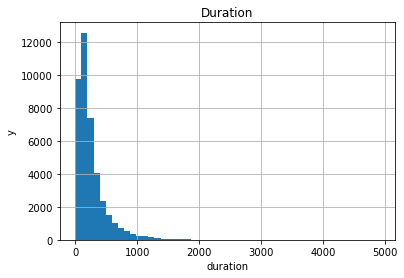

In [43]:
figure2 = data1.duration.hist(bins=50)
figure2.set_title('Duration')
figure2.set_xlabel('duration')
figure2.set_ylabel('y')

<AxesSubplot:>

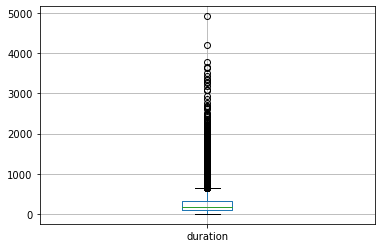

In [44]:
data1.boxplot(column="duration")

In [45]:
data1['duration'].describe()

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [46]:
#### Lets compute the Interquantile range to calculate the boundaries

IQR = data1.duration.quantile(0.75) - data1.duration.quantile(0.25)

In [47]:
lower_bridge = data1['duration'].quantile(0.25) - (IQR * 1.5) 
upper_bridge = data1['duration'].quantile(0.75) + (IQR * 1.5)
print(lower_bridge)
print(upper_bridge)

-223.5
644.5


In [48]:
#### Extreme outliers

lower_bridge = data1['duration'].quantile(0.25) - (IQR * 3)
upper_bridge = data1['duration'].quantile(0.75) + (IQR * 3)
print(lower_bridge)
print(upper_bridge)

-549.0
970.0


In [49]:
data2 = data1.copy()

In [50]:
data2.loc[data2['age'] >= 70,'age'] = 70

In [51]:
data2.loc[data2['duration'] >= 970,'duration'] = 970

Text(0, 0.5, 'y')

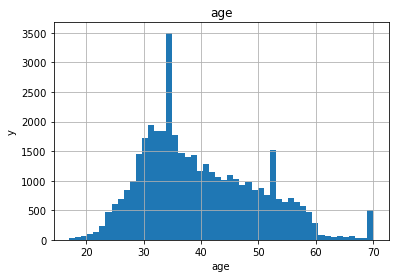

In [52]:
figure=data2.age.hist(bins=50)
figure.set_title('age')
figure.set_xlabel('age')
figure.set_ylabel('y')

Text(0, 0.5, 'y')

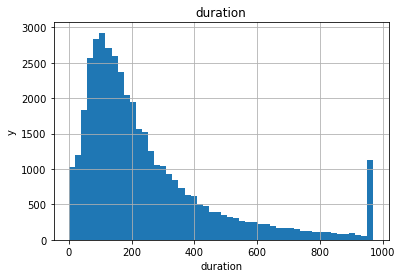

In [53]:
figure=data2.duration.hist(bins=50)
figure.set_title('duration')
figure.set_xlabel('duration')
figure.set_ylabel('y')

---------------------OR-------------------------

In [54]:
# Outliers can be removed by using z-score and IQR formula

## Code to remove outliers in our dataset
## After removing the outliers the few rows gets deleted

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

data1 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data1.shape

#------------------------------------------------------------------------------------------------

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(data))
print(z)

# Setting threshold value. If the datapoint is more than mentioned threshold value the we remove them
threshold = 3
print(np.where(z > 3))

data1 = data[(z < 3).all(axis=1)]
data1.shape

We can see some features are skewed and not normally distributed. The never contacted before respondents skew the variables “campaign” and “previous” towards zero. But it is not compulsary to make the features normally distributed, so we won't do that right now.

The boxplot of pdays looks so strange because most records have pdays as 999. The distribution of the number of days since the previous campaign (“pdays”) is skewed towards 1,000 because, for the respondents who were never contacted, the value is 999. The other values of pdays are very small comaparitively.

We have handled this feature in code below before building our models.

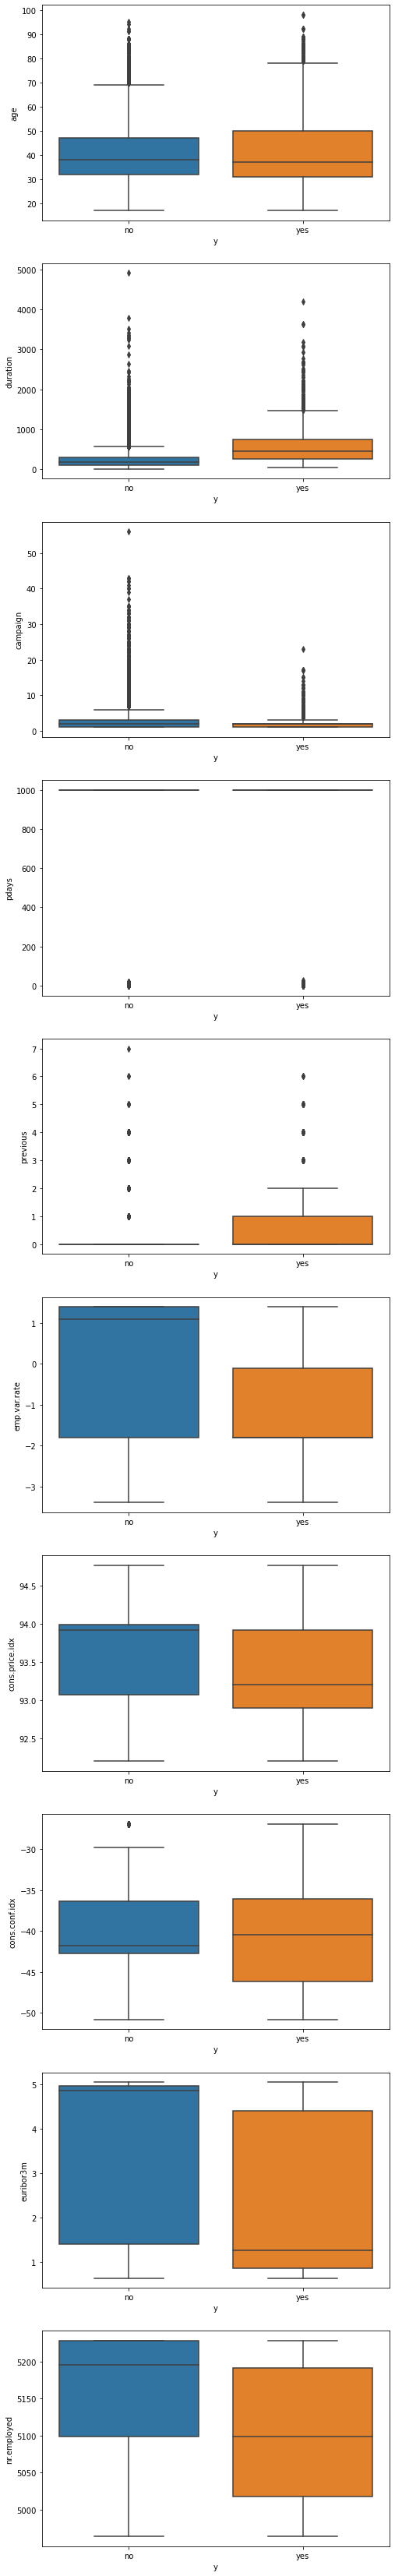

In [55]:
fig, axes = plt.subplots(10, 1, figsize=(8, 60))
for i, c in enumerate(num_cols):
    sns.boxplot(data=data,x='y',y=c,ax=axes[i])

**Observations:** The boxplots for both the classes overlap quite a lot, which means that those particular features aren't necessarily a good indicator for which customer will subscribe and which customer will not.

But features like 'emp.var.rate' and 'euriborm3m' seem very useful as we can clearly see the difference in median for both the classes according to these features.

#### What to do if we have skewed data?

##### We need to do any of the thing mentioned below

    LOG TRANSFORMATION
    
    SQUARE ROOT TRASFORMATION
    
    BOX-COX TRANSFORMATION
    
##### https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

**OR**

#### Gaussian Transformation

**Some machine learning models like linear and logistic regression assume that the variables are normally distributed. Other benefit from "Gaussion-like" distributions, as in such distributions the observations of X available to predict Y vary across a greater range of values. Thus, gaussian distributed variables may boost the machine learning algorithm performance.**

**If a variable is not normally distributed, sometimes it is possible to find a mathematical transformation so that the transformed variable is Gaussian**

##### But the main question lies, how can we transform variables so that they follow gaussian distribution

    1. Logarithmic transformation

    2. Reciprocal transformation

    3. Square root transformation

    4. Exponential transformation

    5. BoxCox transformation

#### Linear Regression Assumptions

**Linear regression has the following assumptions over the predictor variables X:**

##### **1). Linear Relationship:**

**Linear regression needs the relationship between independent and dependent variables to be linear. This linearity assumption can be tested with scatter plots. However as quite obvious the linearity assumption is not valid for ploynomial regression.**

##### **2). Multivariate normality:**

**Regression analysis requires all variables to be multivariate normal. This assumption can be checked with a histogram or Q-Q plot. Normality can be checked with a goodness of fit test, e.g., the Kolmogorav-Smirnov test. When the data not normally distributed a non-linear transformation (e.g., log-transformation) might fix this issue.**

##### **3). Multicollinearity:**

**Regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. You can use a correlation matrix to check if the variables are correlated to each other. You can remove one set of the columns which are correlated while keeping the other.**

##### **4). Homoscedasticity:**

**Homoscedasticity describes a situation in which the error term is the same across all values of the independent variables. The scatterplot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line) If homoscedasticity is present a non-linear correlation might fix the problem**

##### Do variable distribution affect any other machine learning models?

**The remaining machine learning models, including neural networks, support vector machines, tree based models and PCA do not make any assumption over the distribution of the independent variables. Usually we get a better model performance from a guassian like distribution**

#### Q-Q plot

In [58]:
%matplotlib inline
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

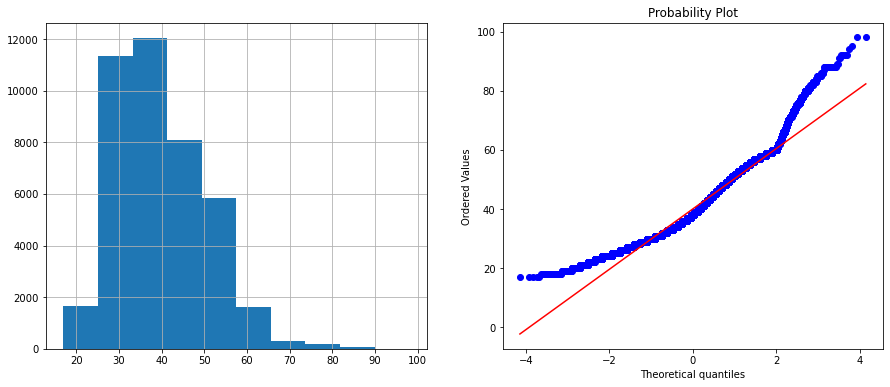

In [61]:
diagnostic_plots(data, 'age')

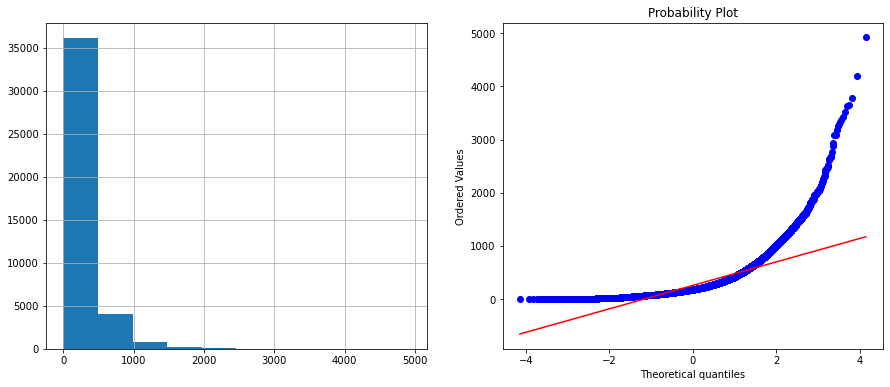

In [64]:
diagnostic_plots(data, 'duration')

### Logarithmic Transformation

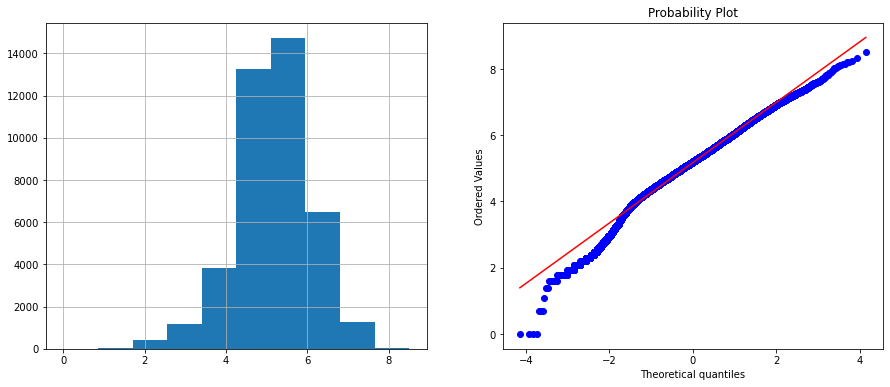

In [65]:
data['log_duration'] = np.log(data['duration']+1)

diagnostic_plots(data,'log_duration')

**The logarithmic distribution does a good job in making duration variable look Gaussian Distributed**

### Reciprocal transformation

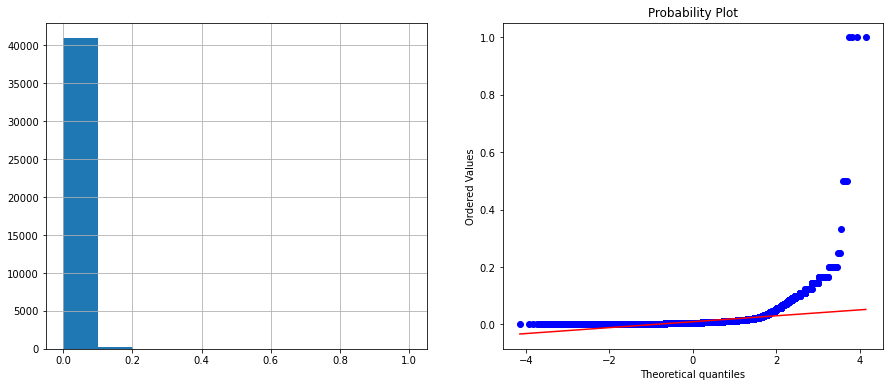

In [66]:
data['Rec_duration'] = 1/(data['duration']+1)

diagnostic_plots(data,'Rec_duration')

### Sqaure Root Tansformation

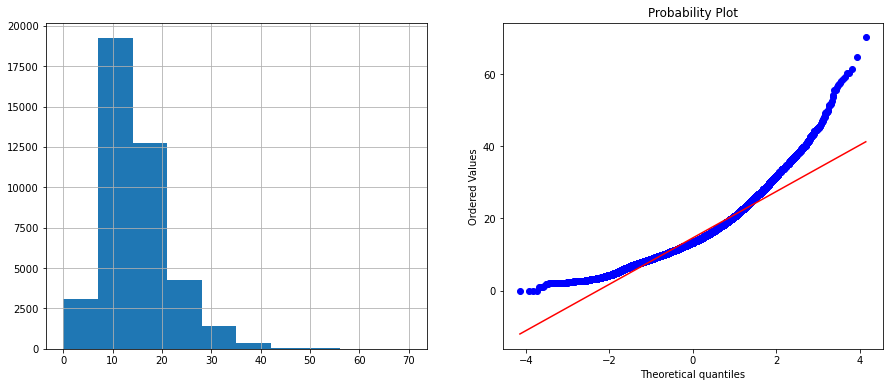

In [67]:
data['sqr_duration'] = data['duration']**(1/2)

diagnostic_plots(data,'sqr_duration')

### Exponential Tanformation

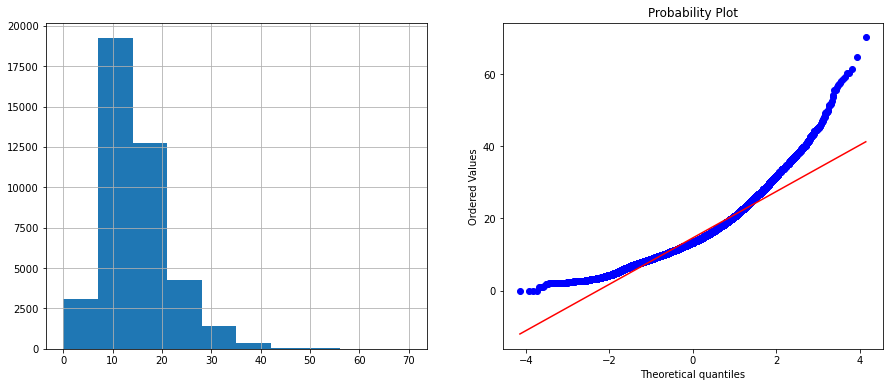

In [68]:
data['Exp_duration'] = data['duration']**(1/5)

diagnostic_plots(data,'sqr_duration')

### BoxCox transformation 

Optimal lambda:  0.12514234575964894


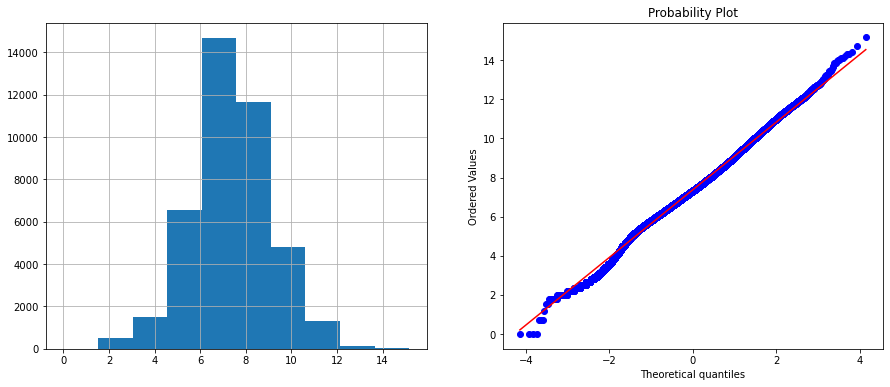

In [69]:
data['Fare_duration'], param = stats.boxcox(data.duration + 1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(data, 'Fare_duration')

#### Univariate Analysis for continuous variables

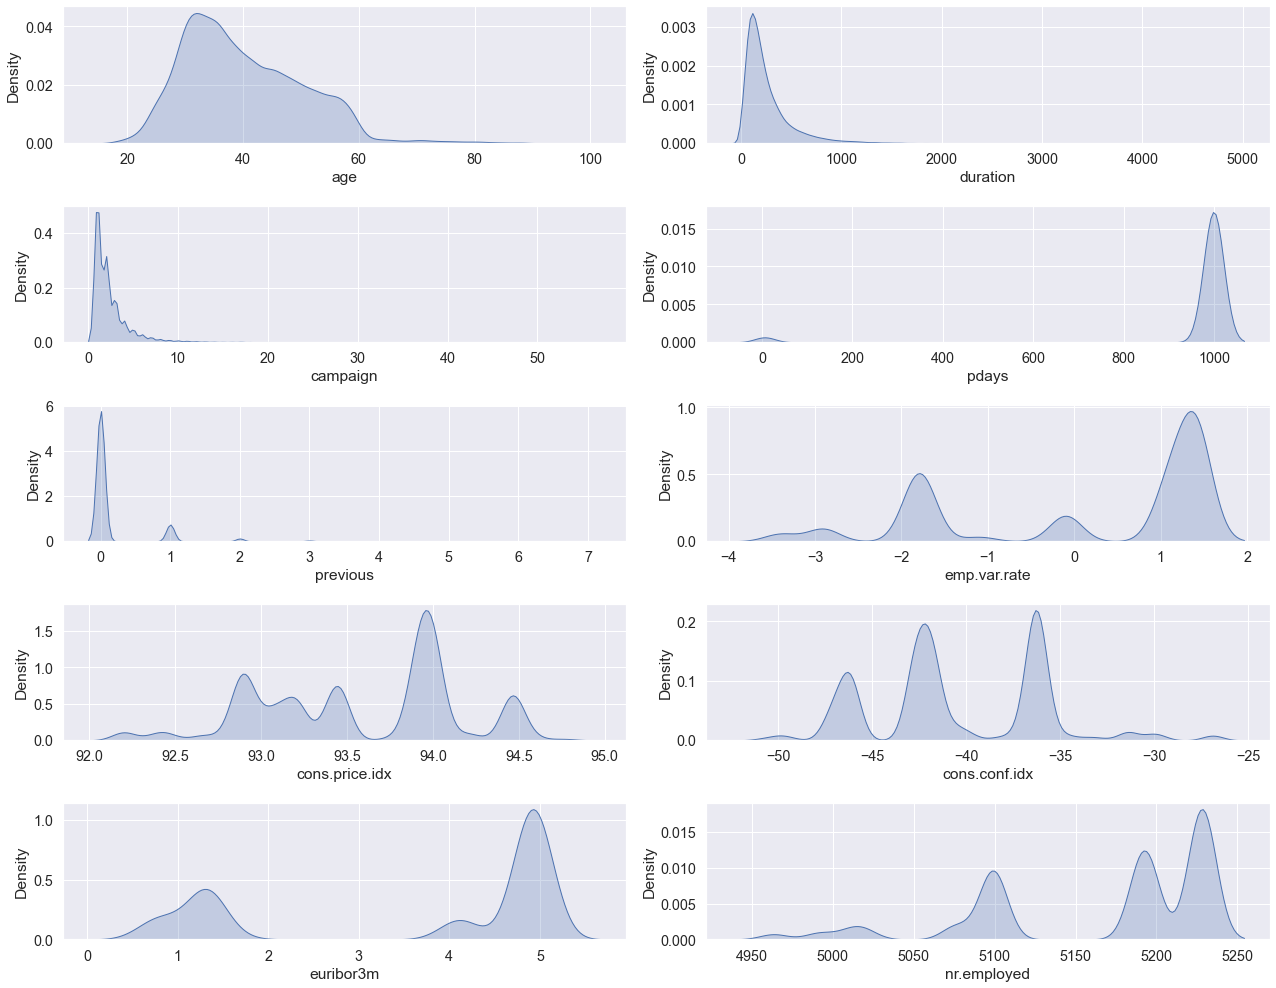

In [55]:
## Density plot

# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset,
# analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

sns.set(font_scale = 1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = sns.kdeplot(data=data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

We could confirm our observation about 'pdays' feature from its kde plot as well!

#### Bivariate Analysis: Relationship between numerical and target variable

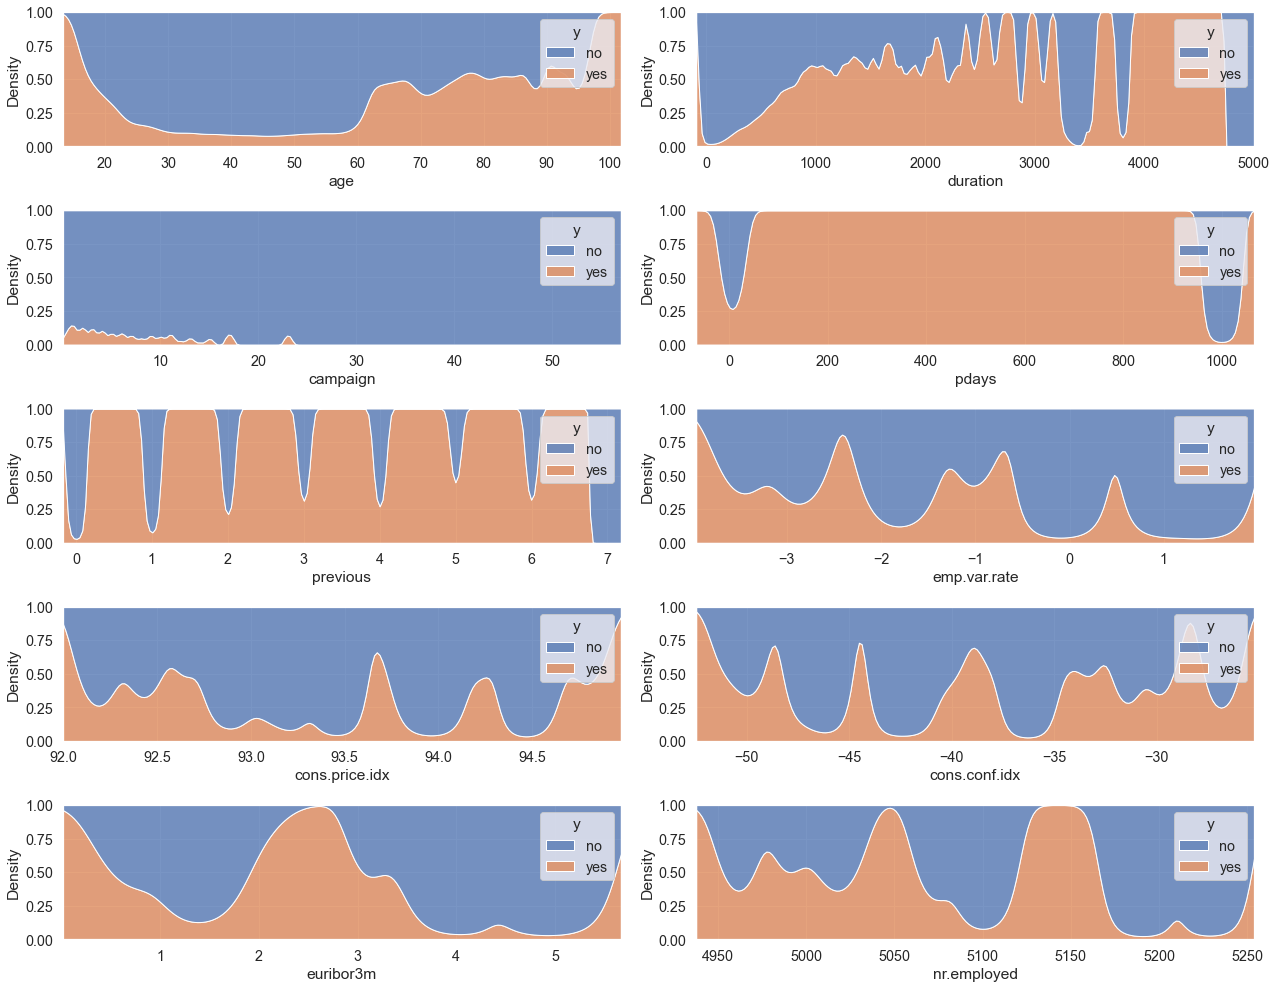

In [56]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = sns.kdeplot(data=data, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

#### **Bivariate Analysis - Horizontal BarPlots**

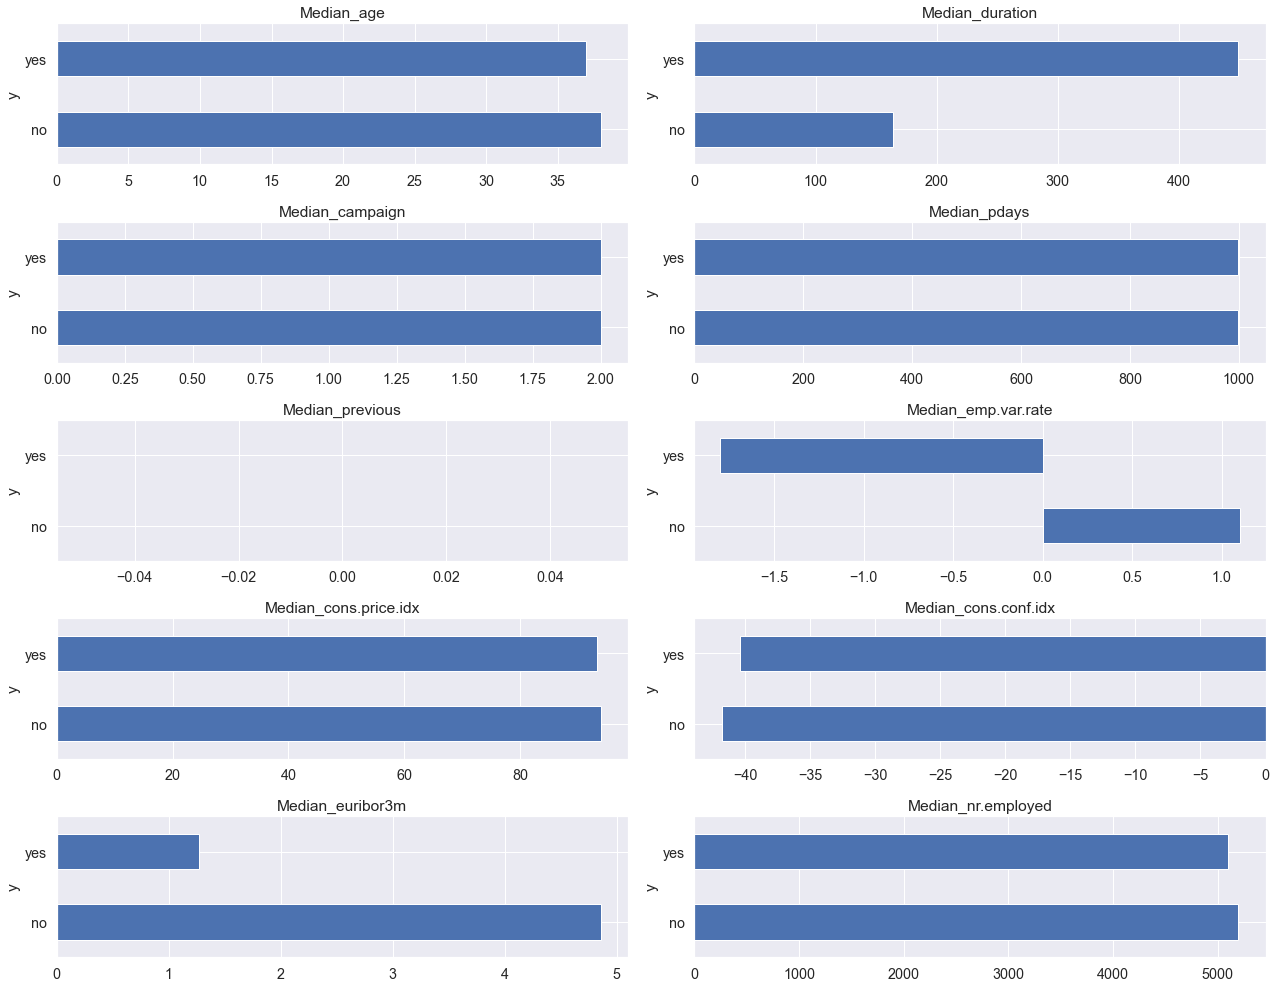

In [57]:
#For each numerical Variable. We will plot the median of the numerical variable for:
#1. When target col == 'no'
#2. when target col == 'yes'

#We are choosing median since median is not affected by outliers, and our data has outliers

sns.set(font_scale=1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = data.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()

5. Are younger customers more likely to subscribe to a term deposit compared to old customers ?

**Observation:** It's not very clear from our above plot since we have median age of around 37 for both cases.

In [58]:
# Number of old subscribers
n1=len(data[(data['age'] > 60) & (data['y'] == 'yes')])

# Number of old non-subscribers
n2=len(data[(data['age'] > 60) & (data['y'] == 'no')]) 

# Number of young subscribers
n3=len(data[(data['age'] <= 60) & (data['y'] == 'yes')])

# Number of young non-subscribers
n4=len(data[(data['age'] <= 60) & (data['y'] == 'no')]) 

print(f'Proportion of young subscribers is: {n3/(n3+n4)} and the proportion of old subscribers is {n1/(n1+n2)}')

Proportion of young subscribers is: 0.10492462810738322 and the proportion of old subscribers is 0.45544554455445546


It looks like effect of marketing on old people is much more positive than corresponding effect on young people! So old people can be a major group we would like to target!

**Q. Does the length of the call made to the customers tell us anything about their chances of subscribing ?**

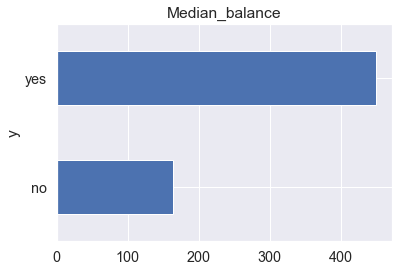

In [59]:
_ = data.groupby(TARGET_COL)['duration'].median().plot(kind = 'barh', title=f'Median_balance')

From the plot above median duration made to the customers not subscribing to a term deposit is around 150 seconds. Median duration made to the customers subscribing to a term deposit is around 450 seconds. So yes our hypothesis seems true.

#### Bivariate Analysis - Correlation Heatmaps

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

##### .00-.19 “very weak”
##### .20-.39 “weak”
##### .40-.59 “moderate”
##### .60-.79 “strong”
##### .80-1.0 “very strong”

In [60]:
data[num_cols].corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000808  0.004622 -0.034381  0.024379   
duration       -0.000808  1.000000 -0.071765 -0.047556  0.020600   
campaign        0.004622 -0.071765  1.000000  0.052606 -0.079182   
pdays          -0.034381 -0.047556  0.052606  1.000000 -0.587508   
previous        0.024379  0.020600 -0.079182 -0.587508  1.000000   
emp.var.rate   -0.000242 -0.027941  0.150786  0.271063 -0.420587   
cons.price.idx  0.001009  0.005303  0.127826  0.078920 -0.203197   
cons.conf.idx   0.129075 -0.008126 -0.013657 -0.091374 -0.050929   
euribor3m       0.010852 -0.032861  0.135169  0.296946 -0.454571   
nr.employed    -0.017607 -0.044672  0.144129  0.372659 -0.501411   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000242        0.001009       0.129075   0.010852   
duration           -0.027941        0.005303      -0.008126  -0.032861   
campaign            0.150786        0.127826      -0.013657   0.135169   
pdays               0.271063        0.078920      -0.091374   0.296946   
previous           -0.420587       -0.203197      -0.050929  -0.454571   
emp.var.rate        1.000000        0.775293       0.196257   0.972244   
cons.price.idx      0.775293        1.000000       0.059170   0.688180   
cons.conf.idx       0.196257        0.059170       1.000000   0.277864   
euribor3m           0.972244        0.688180       0.277864   1.000000   
nr.employed         0.906949        0.521945       0.100679   0.945146   

                nr.employed  
age               -0.017607  
duration          -0.044672  
campaign           0.144129  
pdays              0.372659  
previous          -0.501411  
emp.var.rate       0.906949  
cons.price.idx     0.521945  
cons.conf.idx      0.100679  
euribor3m          0.945146  
nr.employed        1.000000

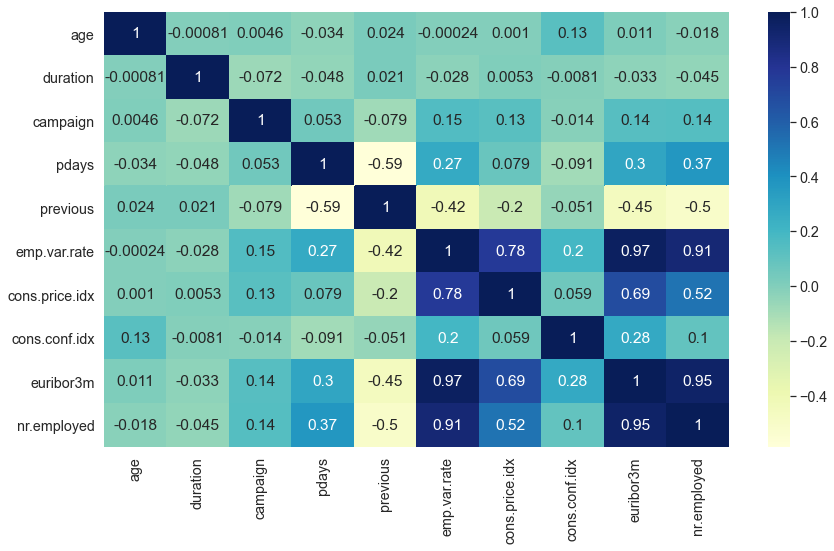

In [61]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(data[num_cols].corr(), annot=True,cmap='YlGnBu') #cmap="RdYlGn" #cmap=plt.cm.CMRmap_r

#### Preparing dataset for model building

In [62]:
#As given in dataset description, we won't use 'duration' column. 

#Reason: We should note here the column “duration” has an interesting relationship with the target variable. 
#If there were no phone calls (i.e. duration = 0) then our target, y, has to be no. This will cause some unbalancing 
#in the model and would inhibit the predictive power. In order to have a more realistic prediction, we will drop 
#this column from our dataframe.

#We can't predict how long we gonna talk to the client (duration) and how many calls would require to get the 
#answer about deposit (campaign), so let's drop these! 

data= data.drop(['duration','campaign'],axis=1)
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  pdays  previous     poutcome  emp.var.rate  \
0   may         mon    999         0  nonexistent           1.1   
1   may         mon    999         0  nonexistent           1.1   
2   may         mon    999         0  nonexistent           1.1   
3   may         mon    999         0  nonexistent           1.1   
4   may         mon    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

In [63]:
#let's remove these two categorical features which we think won't be useful in building our ML models

data.drop(['month','day_of_week'],axis=1,inplace=True)
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
0    999         0  nonexistent           1.1          93.994          -36.4   
1    999         0  nonexistent           1.1          93.994          -36.4   
2    999         0  nonexistent           1.1          93.994          -36.4   
3    999         0  nonexistent           1.1          93.994          -36.4   
4    999         0  nonexistent           1.1          93.994          -36.4   

   euribor3m  nr.employed   y  
0      4.857       5191.0  no  
1      4.857       5191.0  no  
2      4.857       5191.0  no  
3      4.857       5191.0  no  
4      4.857       5191.0  no

In [64]:
# Replacing no and yes by 0 and 1 respectively as our target values

data['y'] = data['y'].replace(['no','yes'],[0,1])
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
0    999         0  nonexistent           1.1          93.994          -36.4   
1    999         0  nonexistent           1.1          93.994          -36.4   
2    999         0  nonexistent           1.1          93.994          -36.4   
3    999         0  nonexistent           1.1          93.994          -36.4   
4    999         0  nonexistent           1.1          93.994          -36.4   

   euribor3m  nr.employed  y  
0      4.857       5191.0  0  
1      4.857       5191.0  0  
2      4.857       5191.0  0  
3      4.857       5191.0  0  
4      4.857       5191.0  0

In [65]:
features = [c for c in data.columns if c not in [TARGET_COL]]
len(features)

16

In [66]:
cat_cols=['job','marital','education','default','housing','loan','contact','poutcome']
for c in cat_cols:
    print("-------------------------------")
    print(data[c].value_counts())

-------------------------------
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
-------------------------------
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
-------------------------------
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
-------------------------------
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
-------------------------------
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
--------------------

In [67]:
## As we can see there are 'unknown' in few categorical variables. These do not add value to our target variable. 

In [68]:
#dropping rows with 'unknown' values for any categorical column.

df = data[(data.job == 'unknown') | (data.marital == 'unknown') | (data.education == 'unknown') | (data.default == 'unknown') | (data.housing == 'unknown') | (data.loan == 'unknown')].index

# drop these given row indexes from dataFrame 

data.drop(df,inplace=True)

data.shape

(30478, 17)

In [69]:
cat_cols=['job','marital','education','default','housing','loan','contact','poutcome']
for c in cat_cols:
    print("-------------------------------")
    print(data[c].value_counts())

-------------------------------
admin.           8734
blue-collar      5674
technician       5469
services         2856
management       2311
retired          1215
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64
-------------------------------
married     17487
single       9439
divorced     3552
Name: marital, dtype: int64
-------------------------------
university.degree      10408
high.school             7697
professional.course     4318
basic.9y                4276
basic.4y                2380
basic.6y                1388
illiterate                11
Name: education, dtype: int64
-------------------------------
no     30475
yes        3
Name: default, dtype: int64
-------------------------------
yes    16516
no     13962
Name: housing, dtype: int64
-------------------------------
no     25710
yes     4768
Name: loan, dtype: int64
-------------------------------
cellular     20435
telephone    1004

In [70]:
## As we can see above row having 'unknown' is removed

#### Since number of categories for each column is low, we can use ONE HOT ENCODING.

In [71]:
# Converting all Categorical Variables to numbers.

data= pd.get_dummies(data,columns=cat_cols)
data.head()

age  pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   56    999         0           1.1          93.994          -36.4   
2   37    999         0           1.1          93.994          -36.4   
3   40    999         0           1.1          93.994          -36.4   
4   56    999         0           1.1          93.994          -36.4   
6   59    999         0           1.1          93.994          -36.4   

   euribor3m  nr.employed  y  job_admin.  ...  default_yes  housing_no  \
0      4.857       5191.0  0           0  ...            0           1   
2      4.857       5191.0  0           0  ...            0           0   
3      4.857       5191.0  0           1  ...            0           1   
4      4.857       5191.0  0           0  ...            0           1   
6      4.857       5191.0  0           1  ...            0           1   

   housing_yes  loan_no  loan_yes  contact_cellular  contact_telephone  \
0            0        1         0                 0                  1   
2            1        1         0                 0                  1   
3            0        1         0                 0                  1   
4            0        0         1                 0                  1   
6            0        1         0                 0                  1   

   poutcome_failure  poutcome_nonexistent  poutcome_success  
0                 0                     1                 0  
2                 0                     1                 0  
3                 0                     1                 0  
4                 0                     1                 0  
6                 0                     1                 0  

[5 rows x 41 columns]

In [72]:
data['pdays'].value_counts()

999    29168
3        381
6        363
4        102
2         53
9         53
12        50
7         50
5         43
10        40
13        33
11        25
15        22
1         21
14        17
0         14
8         13
16         8
17         6
18         5
19         3
22         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

As we can see most records have pdays as 999. This means most records indicate the particular person was not contacted before. Let's convert this pdays column into a binary categorical column with 2 values:

0: pdays is 999 i.e person was not contacted and 

1: pdays!=999 i.e person was contacted before.

In [73]:
#Syntax:
#df[new_column]=np.where(condition, value if condition is true, value if condition is false)

data['has_contacted'] = np.where(data['pdays']!= 999, True, False)

data.drop(['pdays'],axis=1,inplace=True)

data.head()

age  previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0   56         0           1.1          93.994          -36.4      4.857   
2   37         0           1.1          93.994          -36.4      4.857   
3   40         0           1.1          93.994          -36.4      4.857   
4   56         0           1.1          93.994          -36.4      4.857   
6   59         0           1.1          93.994          -36.4      4.857   

   nr.employed  y  job_admin.  job_blue-collar  ...  housing_no  housing_yes  \
0       5191.0  0           0                0  ...           1            0   
2       5191.0  0           0                0  ...           0            1   
3       5191.0  0           1                0  ...           1            0   
4       5191.0  0           0                0  ...           1            0   
6       5191.0  0           1                0  ...           1            0   

   loan_no  loan_yes  contact_cellular  contact_telephone  poutcome_failure  \
0        1         0                 0                  1                 0   
2        1         0                 0                  1                 0   
3        1         0                 0                  1                 0   
4        0         1                 0                  1                 0   
6        1         0                 0                  1                 0   

   poutcome_nonexistent  poutcome_success  has_contacted  
0                     1                 0          False  
2                     1                 0          False  
3                     1                 0          False  
4                     1                 0          False  
6                     1                 0          False  

[5 rows x 41 columns]

In [74]:
# One hot encoding 'has_contacted' feature

data= pd.get_dummies(data,columns=['has_contacted'])
data.head()

age  previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0   56         0           1.1          93.994          -36.4      4.857   
2   37         0           1.1          93.994          -36.4      4.857   
3   40         0           1.1          93.994          -36.4      4.857   
4   56         0           1.1          93.994          -36.4      4.857   
6   59         0           1.1          93.994          -36.4      4.857   

   nr.employed  y  job_admin.  job_blue-collar  ...  housing_yes  loan_no  \
0       5191.0  0           0                0  ...            0        1   
2       5191.0  0           0                0  ...            1        1   
3       5191.0  0           1                0  ...            0        1   
4       5191.0  0           0                0  ...            0        0   
6       5191.0  0           1                0  ...            0        1   

   loan_yes  contact_cellular  contact_telephone  poutcome_failure  \
0         0                 0                  1                 0   
2         0                 0                  1                 0   
3         0                 0                  1                 0   
4         1                 0                  1                 0   
6         0                 0                  1                 0   

   poutcome_nonexistent  poutcome_success  has_contacted_False  \
0                     1                 0                    1   
2                     1                 0                    1   
3                     1                 0                    1   
4                     1                 0                    1   
6                     1                 0                    1   

   has_contacted_True  
0                   0  
2                   0  
3                   0  
4                   0  
6                   0  

[5 rows x 42 columns]

In [75]:
features = [c for c in data.columns if c not in [TARGET_COL]]
len(features)

41

#### **Split the combined dataset after preprocessing into train and test sets.**

We will use 80-20 split with 80% of the rows belonging to training data.

**Let's first train our model with imbalanced data.**

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix,classification_report


train, test = train_test_split(data, test_size=0.2, random_state = 1)
print("Training dataset shape:",train.shape)
print("Training dataset shape:",test.shape)

Training dataset shape: (24382, 42)
Training dataset shape: (6096, 42)


In [77]:
train.head()

age  previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
4480    31         0           1.1          93.994          -36.4      4.856   
34306   29         0          -1.8          92.893          -46.2      1.266   
14133   53         0           1.4          93.918          -42.7      4.962   
5987    51         0           1.1          93.994          -36.4      4.857   
39805   29         2          -1.7          94.055          -39.8      0.704   

       nr.employed  y  job_admin.  job_blue-collar  ...  housing_yes  loan_no  \
4480        5191.0  0           0                1  ...            0        1   
34306       5099.1  0           0                1  ...            0        1   
14133       5228.1  0           0                0  ...            1        1   
5987        5191.0  0           0                0  ...            0        1   
39805       4991.6  0           1                0  ...            1        1   

       loan_yes  contact_cellular  contact_telephone  poutcome_failure  \
4480          0                 0                  1                 0   
34306         0                 1                  0                 0   
14133         0                 1                  0                 0   
5987          0                 0                  1                 0   
39805         0                 1                  0                 1   

       poutcome_nonexistent  poutcome_success  has_contacted_False  \
4480                      1                 0                    1   
34306                     1                 0                    1   
14133                     1                 0                    1   
5987                      1                 0                    1   
39805                     0                 0                    1   

       has_contacted_True  
4480                    0  
34306                   0  
14133                   0  
5987                    0  
39805                   0  

[5 rows x 42 columns]

In [78]:
#Input to our model will be the features
X_train, X_test = train[features], test[features]

#Output of our model will be the TARGET_COL
y_train, y_test = train[TARGET_COL], test[TARGET_COL]

### To find the p-values we have to use STATSMODELS library and LOGIT function

In [79]:
#import statsmodels.api as sm
#my_fit = sm.Logit(y_train_res,X_train_res)
#p_value = my_fit.fit()
#p_value.summary2()

From this summary we have to find that which variables are significant or not,when the variables are not significant for 5% level of significance we have to drop that column and compare AIC value of te particular column with overall column.when overall < individual AIC we should not drop the column and when vice versa we have to drop the column and can have the clearnce upto 2% level.

#### Principle Component Analysis: 

**https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e**

**https://pub.towardsai.net/principal-component-analysis-pca-with-python-examples-tutorial-67a917bae9aa**

**https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Clustering-Dimensionality-Reduction/Principal%20Component%20Analysis.ipynb**

## Feature Selection

#### 3 Feature selection techniques that are easy to use and also gives good results.
    
    1. Univariate Selection

    2. Feature Importance

    3. Correlation Matrix with Heatmap

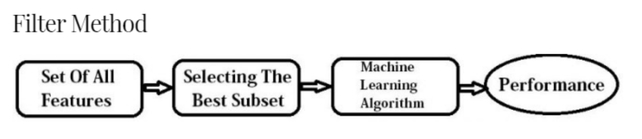

In [93]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\4.jpg')

**Forward Selection:** Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

**Backward Elimination:** In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

**Recursive Feature elimination:** It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

### **Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The **chi-squared (chi²) statistical test is used for non-negative features** to select 10 of the best features from the Dataset.

#### ***Here in my dataset But I am using ANOVA(F-test) because negative value is an important factor in my dataset so I am picking another statistic to score features***

In [99]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 10 best features

#bestfeatures = SelectKBest(score_func=chi2, k=10)   # chi-squared (chi²) statistical test for non-negative features

bestfeatures = SelectKBest(score_func=f_classif, k=10) # ANOVA (F-test) statistical test for all features

fit = bestfeatures.fit(X_train_res,y_train_res)

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X_train_res.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns

featureScores

Specs         Score
0                             age    117.934538
1                        previous   1649.124024
2                    emp.var.rate   9372.074664
3                  cons.price.idx   1275.727848
4                   cons.conf.idx    270.174673
5                       euribor3m  10374.420994
6                     nr.employed  11906.206184
7                      job_admin.    230.099464
8                 job_blue-collar   1741.164469
9                job_entrepreneur    458.880482
10                  job_housemaid    189.624578
11                 job_management    553.067580
12                    job_retired    367.584697
13              job_self-employed    337.712079
14                   job_services    962.148916
15                    job_student    145.468408
16                 job_technician    793.996691
17                 job_unemployed    176.824747
18               marital_divorced    703.437219
19                marital_married    966.344161
20                 marital_single      2.561799
21             education_basic.4y    186.899741
22             education_basic.6y    498.257157
23             education_basic.9y   1289.635007
24          education_high.school    913.751866
25           education_illiterate      2.778417
26  education_professional.course    637.010644
27    education_university.degree     83.097279
28                     default_no      2.000094
29                    default_yes      2.000094
30                     housing_no    926.706804
31                    housing_yes    512.119654
32                        loan_no     97.333658
33                       loan_yes   1059.620890
34               contact_cellular   1607.597386
35              contact_telephone   4075.141168
36               poutcome_failure    261.906712
37           poutcome_nonexistent   3689.298282
38               poutcome_success   2901.531342
39            has_contacted_False   5722.556862
40             has_contacted_True   3182.896329

In [100]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs         Score
6            nr.employed  11906.206184
5              euribor3m  10374.420994
2           emp.var.rate   9372.074664
39   has_contacted_False   5722.556862
35     contact_telephone   4075.141168
37  poutcome_nonexistent   3689.298282
40    has_contacted_True   3182.896329
38      poutcome_success   2901.531342
8        job_blue-collar   1741.164469
1               previous   1649.124024


### Feature Selection-Information gain - mutual information In Classification

#### Mutual Information

MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [119]:
from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(X_train_res, y_train_res)
mutual_info

array([0.02494372, 0.0225849 , 0.12029402, 0.1883533 , 0.18793944,
       0.4105048 , 0.13541501, 0.00230069, 0.02011803, 0.00828757,
       0.00191215, 0.0089517 , 0.00318156, 0.00731522, 0.01014095,
       0.00058213, 0.01053512, 0.        , 0.01018971, 0.01180071,
       0.00249308, 0.        , 0.0062888 , 0.01891106, 0.01175357,
       0.        , 0.00507542, 0.00642998, 0.00390279, 0.        ,
       0.01438523, 0.00689201, 0.00217976, 0.01145004, 0.02200943,
       0.04336423, 0.00215997, 0.04334101, 0.0366851 , 0.07387545,
       0.0422065 ])

In [120]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_res.columns
mutual_info.sort_values(ascending=False)

euribor3m                        0.410505
cons.price.idx                   0.188353
cons.conf.idx                    0.187939
nr.employed                      0.135415
emp.var.rate                     0.120294
has_contacted_False              0.073875
contact_telephone                0.043364
poutcome_nonexistent             0.043341
has_contacted_True               0.042207
poutcome_success                 0.036685
age                              0.024944
previous                         0.022585
contact_cellular                 0.022009
job_blue-collar                  0.020118
education_basic.9y               0.018911
housing_no                       0.014385
marital_married                  0.011801
education_high.school            0.011754
loan_yes                         0.011450
job_technician                   0.010535
marital_divorced                 0.010190
job_services                     0.010141
job_management                   0.008952
job_entrepreneur                 0

<AxesSubplot:>

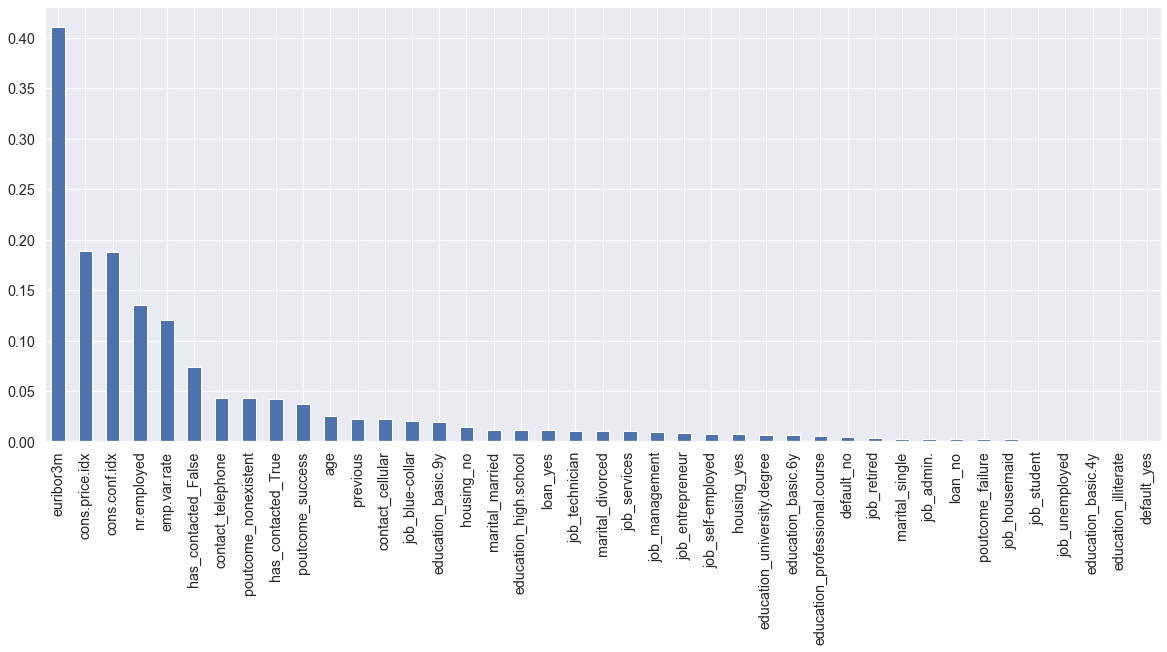

In [121]:
#let's plot the ordered mutual_info values per feature

mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [123]:
from sklearn.feature_selection import SelectKBest

#No we Will select the  top 10 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train_res, y_train_res)
X_train_res.columns[sel_five_cols.get_support()]

Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'has_contacted_False', 'has_contacted_True'],
      dtype='object')

##### Difference Between Information Gain And Mutual Information

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

### Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [102]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()
ETC.fit(X_train_res, y_train_res)

ExtraTreesClassifier()

In [103]:
print(ETC.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[1.00218856e-01 7.81609584e-03 5.19961387e-02 3.11331885e-02
 3.54494531e-02 1.39335437e-01 5.05185986e-02 2.37031417e-02
 2.48068623e-02 1.09899952e-02 6.89333036e-03 1.58813682e-02
 6.78402307e-03 1.12180457e-02 1.70443974e-02 4.95726244e-03
 1.94309507e-02 8.19201465e-03 1.95351874e-02 2.36580463e-02
 2.51203928e-02 1.46197920e-02 1.19745908e-02 2.19584673e-02
 2.61708453e-02 2.00338471e-04 1.93384832e-02 2.65330646e-02
 1.77222738e-06 1.48747598e-06 3.39287361e-02 3.00643354e-02
 2.58853163e-02 1.70064971e-02 1.71917200e-02 3.47837204e-02
 2.01121230e-02 2.35325363e-02 7.84859683e-03 2.48692033e-02
 9.29558847e-03]


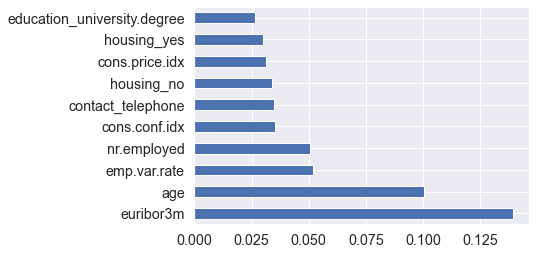

In [104]:
feat_importances = pd.Series(ETC.feature_importances_, index=X_train_res.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### **We can use Correlation Matrix with Heatmap for feature selection**

#### **Dealing with Multicollinearity of Features**

The term multicollinearity(also called collinearity) exists whenever an independent variable (feature) is highly correlated with another independent variable. This may not seem to be an issue at first but in terms of regression analysis, the main goal is to identify relationships between the independent variable and the target variable. Features that are highly correlated can definitely provide some falsities in our outcome. Therefore if a change is made in one predictor then another predictor is affected as well.

**Two main methods for identifying multicollinearity between features: correlation matrix and heatmaps.**

In [105]:
X_train_res.corr()

age  previous  emp.var.rate  \
age                            1.000000  0.055458     -0.090580   
previous                       0.055458  1.000000     -0.332983   
emp.var.rate                  -0.090580 -0.332983      1.000000   
cons.price.idx                -0.043590 -0.013857      0.706632   
cons.conf.idx                  0.133745  0.044214     -0.080370   
euribor3m                     -0.083229 -0.407520      0.954075   
nr.employed                   -0.110704 -0.480887      0.855914   
job_admin.                    -0.139158 -0.019766      0.020434   
job_blue-collar               -0.053000 -0.077711      0.128205   
job_entrepreneur               0.019539 -0.027568      0.053275   
job_housemaid                  0.060647 -0.012683      0.043521   
job_management                 0.037610 -0.019531      0.043382   
job_retired                    0.553609  0.065530     -0.151998   
job_self-employed             -0.013683 -0.029687      0.037335   
job_services                  -0.066108 -0.038760      0.086262   
job_student                   -0.207536  0.079105     -0.113552   
job_technician                -0.075917 -0.044688      0.112922   
job_unemployed                -0.011105 -0.008801      0.006207   
marital_divorced               0.163098 -0.018000      0.075647   
marital_married                0.273837 -0.053187      0.108451   
marital_single                -0.452816  0.013546     -0.057665   
education_basic.4y             0.281177 -0.009355      0.000506   
education_basic.6y             0.003322 -0.030263      0.056881   
education_basic.9y            -0.043095 -0.059485      0.099209   
education_high.school         -0.118717 -0.038133      0.067190   
education_illiterate           0.007605 -0.003746      0.004255   
education_professional.course -0.015233 -0.036309      0.072879   
education_university.degree   -0.110639  0.007422     -0.008093   
default_no                    -0.000009 -0.002638     -0.005107   
default_yes                    0.000009  0.002638      0.005107   
housing_no                    -0.049230 -0.065910      0.131797   
housing_yes                   -0.014444 -0.011481      0.008481   
loan_no                       -0.020259 -0.016342      0.024327   
loan_yes                      -0.019730 -0.033328      0.067140   
contact_cellular               0.003818  0.181836     -0.370244   
contact_telephone             -0.034989 -0.203727      0.443902   
poutcome_failure               0.003181  0.464026     -0.212936   
poutcome_nonexistent          -0.108187 -0.764671      0.466215   
poutcome_success               0.028118  0.608984     -0.260048   
has_contacted_False           -0.102445 -0.655833      0.347423   
has_contacted_True             0.032203  0.675432     -0.275106   

                               cons.price.idx  cons.conf.idx  euribor3m  \
age                                 -0.043590       0.133745  -0.083229   
previous                            -0.013857       0.044214  -0.407520   
emp.var.rate                         0.706632      -0.080370   0.954075   
cons.price.idx                       1.000000      -0.179656   0.542063   
cons.conf.idx                       -0.179656       1.000000   0.032951   
euribor3m                            0.542063       0.032951   1.000000   
nr.employed                          0.303470      -0.092613   0.937310   
job_admin.                          -0.012056       0.010726   0.025001   
job_blue-collar                      0.070402      -0.120615   0.122940   
job_entrepreneur                     0.025155      -0.030371   0.062003   
job_housemaid                        0.027451       0.020344   0.046015   
job_management                       0.000178      -0.006207   0.059287   
job_retired                         -0.068932       0.109831  -0.152058   
job_self-employed                    0.007678      -0.022400   0.041717   
job_services                         0.050969      -0.059041   0.084552   
job_student          

At first glance, we can see that the feature names are listed horizontally and vertically. Correlation between the features will take a value of -1 to 1 in which -1 means a negative linear relationship and 1 is a positive linear relationship. It is important to note that features of the same name (feature that meet diagonally above)will always be a 1. For example, age and age with have a value of 1.

Looking into this further, we can see that for example emp.var.rate vs cons.price.idx have a .71 relationship. This usually means that one of these features’ column may have to be dropped from the dataset entirely to have better results in your linear regression model. At that point, it would be prudent to do some research to decide which of these features is best to remove.

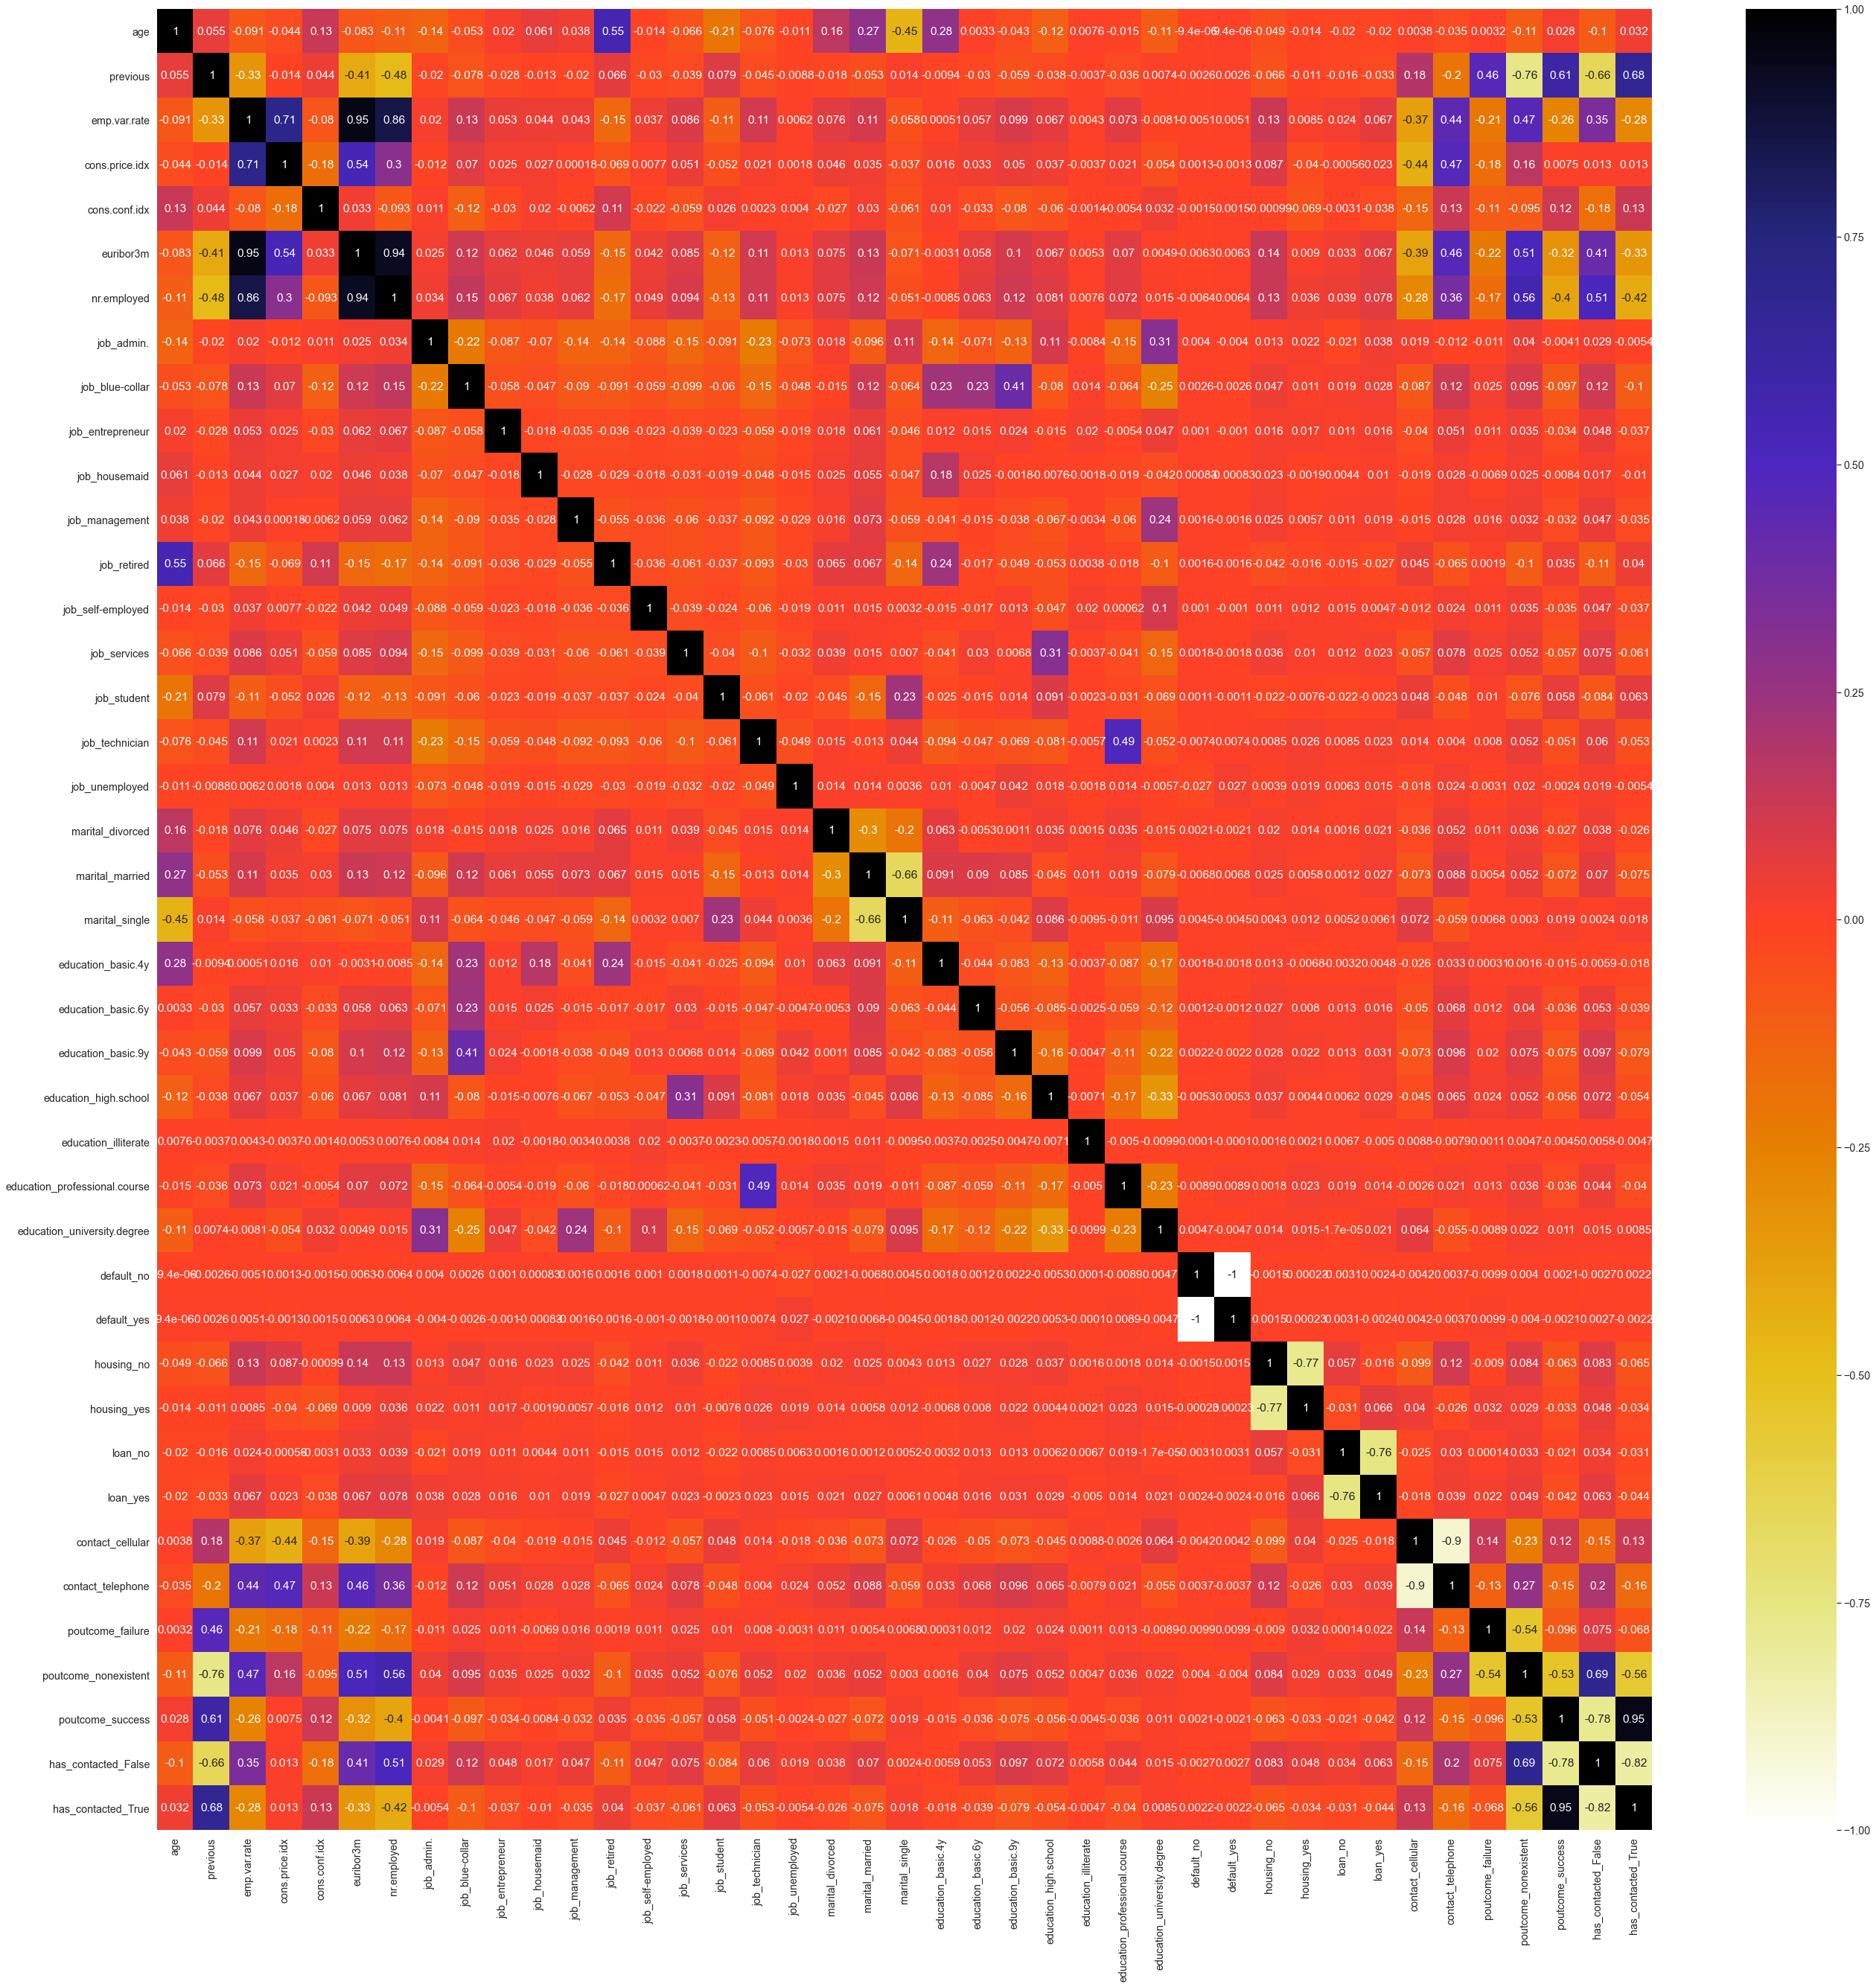

In [110]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(45,45))
cor = X_train_res.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

**“What value represents high multicollinearity?”**

The cutoff value that is mostly used in the data science industry is 0.7 to 0.8. Let’s perform another correlation analysis of our features but this time only selecting values that are greater than 0.7 **OR** 0.75

In [2]:
## Just checking

#abs(X_train_res.corr())>0.7
#------OR-------
#abs(X_train_res.corr())>0.75

This returns a boolean matrix in which the values that are greater than 0.7 or 0.75 will be set to true. Let’s proceed with another method called heatmaps!

In [111]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [112]:
# Calling function
corr_features = correlation(X_train_res, 0.7)

# Checking how many features are having high correlation greater than 0.7
print("Number of features which are having high correlation greater than 0.7 are: ",len(set(corr_features)))

10

In [113]:
# Checking what are the feature names which are having high correlation greater than 0.7
print("Feature names which are having high correlation greater than 0.7 are: ",corr_features)

{'cons.price.idx',
 'contact_telephone',
 'default_yes',
 'euribor3m',
 'has_contacted_False',
 'has_contacted_True',
 'housing_yes',
 'loan_yes',
 'nr.employed',
 'poutcome_nonexistent'}

In [116]:
# Dropping these features from the dataset
X_train_res.drop(corr_features,axis=1)

age  previous  emp.var.rate  cons.conf.idx  job_admin.  \
0       31         0           1.1     -36.400000           0   
1       29         0          -1.8     -46.200000           0   
2       53         0           1.4     -42.700000           0   
3       51         0           1.1     -36.400000           0   
4       29         2          -1.7     -39.800000           1   
...    ...       ...           ...            ...         ...   
42513   35         0          -0.1     -42.000000           1   
42514   55         1          -1.1     -49.678519           0   
42515   42         0          -3.4     -26.900000           0   
42516   39         0           1.4     -42.700000           0   
42517   29         3          -1.7     -40.202787           1   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                    1                 0              0               0   
1                    1                 0              0               0   
2                    0                 0              0               0   
3                    0                 0              0               0   
4                    0                 0              0               0   
...                ...               ...            ...             ...   
42513                0                 0              0               0   
42514                0                 0              0               0   
42515                0                 0              0               0   
42516                0                 0              0               0   
42517                0                 0              0               0   

       job_retired  ...  education_high.school  education_illiterate  \
0                0  ...                      0                     0   
1                0  ...                      0                     0   
2                0  ...                      0                     0   
3                0  ...                      0                     0   
4                0  ...                      0                     0   
...            ...  ...                    ...                   ...   
42513            0  ...                      0                     0   
42514            0  ...                      0                     0   
42515            0  ...                      0                     0   
42516            0  ...                      1                     0   
42517            0  ...                      0                     0   

       education_professional.course  education_university.degree  default_no  \
0                                  0                            0           1   
1                                  0                            0           1   
2                                  0                            1           1   
3                                  1                            0           1   
4                                  0                            1           1   
...                              ...                          ...         ...   
42513                              0                            1           1   
42514                              1                            0           1   
42515                              0                            1           1   
42516                              0                            0           1   
42517                              0                            0           1   

       housing_no  loan_no  contact_cellular  poutcome_failure  \
0               1        1                 0                 0   
1               1        1                 1                 0   
2               0        1                 1                 0   
3               1        1                 0                 0   
4               0        1                 1                 1   
...           ...      ...               ...               ...   
42513           0        

In [118]:
#X_test.drop(corr_features,axis=1)

### Detecting Multicollinearity using VIF

**VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.**

**or**

**VIF score of an independent variable represents how well the variable is explained by other independent variables.**

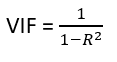

In [83]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\0006.png')

In [80]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#df = df._get_numeric_data() #drop non-numeric cols
#df.head()

**VIF starts at 1 and has no upper limit**

**VIF = 1, no correlation between the independent variable and the other variables**

**VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others**

In [82]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]

print(vif_data)

C:\Users\karth\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                          feature        VIF
0                             age   1.709290
1                        previous   5.728144
2                    emp.var.rate  36.928538
3                  cons.price.idx   9.617805
4                   cons.conf.idx   2.820100
5                       euribor3m  63.147261
6                     nr.employed  34.414191
7                      job_admin.        inf
8                 job_blue-collar        inf
9                job_entrepreneur        inf
10                  job_housemaid        inf
11                 job_management        inf
12                    job_retired        inf
13              job_self-employed        inf
14                   job_services        inf
15                    job_student        inf
16                 job_technician        inf
17                 job_unemployed        inf
18               marital_divorced        inf
19                marital_married        inf
20                 marital_single        inf
21        

We can see here that the ‘emp.var.rate’, ‘euribor3m’ and 'nr.employed' have a high VIF value, meaning they can be predicted by other independent variables in the dataset.

#### **NOTE:**

**Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.**

##### Fixing Multicollinearity

**Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:**

In [84]:
# df2 = X_train.drop(['emp.var.rate','euribor3m'],axis=1)
# df2

### Feature Selection- Dropping constant features

In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

#### Variance Threshold

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [124]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train_res)

VarianceThreshold(threshold=0)

In [125]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [126]:
### Finding non constant features

sum(var_thres.get_support())

41

In [127]:
constant_columns = [column for column in X_train_res.columns
                    if column not in X_train_res.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [128]:
for column in constant_columns:
    print(column)

In [129]:
X_train_res.drop(constant_columns,axis=1)

age  previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0       31         0           1.1       93.994000     -36.400000   4.856000   
1       29         0          -1.8       92.893000     -46.200000   1.266000   
2       53         0           1.4       93.918000     -42.700000   4.962000   
3       51         0           1.1       93.994000     -36.400000   4.857000   
4       29         2          -1.7       94.055000     -39.800000   0.704000   
...    ...       ...           ...             ...            ...        ...   
42513   35         0          -0.1       93.200000     -42.000000   4.050322   
42514   55         1          -1.1       94.623796     -49.678519   1.004806   
42515   42         0          -3.4       92.431000     -26.900000   0.731992   
42516   39         0           1.4       93.918000     -42.700000   4.964596   
42517   29         3          -1.7       94.183892     -40.202787   0.811669   

       nr.employed  job_admin.  job_blue-collar  job_entrepreneur  ...  \
0           5191.0           0                1                 0  ...   
1           5099.1           0                1                 0  ...   
2           5228.1           0                0                 0  ...   
3           5191.0           0                0                 0  ...   
4           4991.6           1                0                 0  ...   
...            ...         ...              ...               ...  ...   
42513       5195.8           1                0                 0  ...   
42514       4963.6           0                0                 0  ...   
42515       5017.5           0                0                 0  ...   
42516       5228.1           0                0                 0  ...   
42517       4991.6           1                0                 0  ...   

       housing_yes  loan_no  loan_yes  contact_cellular  contact_telephone  \
0                0        1         0                 0                  1   
1                0        1         0                 1                  0   
2                1        1         0                 1                  0   
3                0        1         0                 0                  1   
4                1        1         0                 1                  0   
...            ...      ...       ...               ...                ...   
42513            1        1         0                 1                  0   
42514            0        1         0                 1                  0   
42515            1        1         0                 0                  0   
42516            1        0         0                 1                  0   
42517            0        1         0                 1                  0   

       poutcome_failure  poutcome_nonexistent  poutcome_success  \
0                     0                     1                 0   
1                     0                     1                 0   
2                     0                     1                 0   
3                     0                     1                 0   
4                     1                     0                 0   
...                 ...                   ...               ...   
42513                 0                     1                 0   
42514                 0                     0                 1   
42515                 0                     0                 0   
42516                 0                     1                 0   
42517                 0                     0                 1   

       has_contacted_False  has_contacted_True  
0                        1                   0  
1                        1                   0  
2                        1                   0  
3                        1                   0  
4                        1                   0  
...                    ...                 ...  
42513                    1                   0  
42514                  

#### **Performance Metrics for our Models:**

A classifier is only as good as the metric used to evaluate it. 

If we choose the wrong metric to evaluate our models, we are likely to choose a poor model, or in the worst case, be misled about the expected performance of your model.

Classification Accuracy should not be used as a metric for imbalanced classification. 

This is so because even if our model is not intelligent and just guesses all clients as the majority class "not subscribing to the term deposit", we will get a very high accuracy. 

When we want to give equal weight to both classes prediction ability we should look at the ROC curve. 

ROC Area Under Curve (AUC) Score is used as the metric for imbalanced data. 

ROC AUC score gets over the above described problem by looking into both the True positive rate (TPR) and False positive rate (FPR). 

Only if both the TPR and FPR are well above the random line in the ROC curve, we will get a good AUC. Accuracy does not guarantee that.

We will also be seeing F1-Score as our secondary performance metric to analyze the performance of our models. 

What we are trying to achieve with the F1-score metric is to find an equal balance between precision and recall, which is extremely useful in most scenarios when we are working with imbalanced datasets.

#### LOGISTIC REGRESSION

Logsitic regression uses a line (Sigmoid function) in the form of an "S" to predict if the dependent variable is true or false based on the independent variables. The "S-shaped" curve (on the line graph) will show the probability of the dependent variable occuring based on where the points of the independent variables lands on the curve. In this case, the output (y) is predicted by the numerical and categorical variables defined as "x" such as age, education and so on. Logistic regresssion is best used for classifying samples.

##### Normalization - Feature Scaling

Every feature has two components i.e., unit and magnitude.
We use MinMaxScaler for performing normalization to our features.

    from sklearn.preprocessing import MinMaxScaler

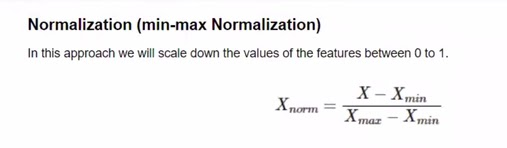

In [153]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\300.jpg')

##### Standardization - Feature Scaling

We use SandardScaler for performing standardization to our features.

    from sklearn.preprocessing import SandardScaler


##### When to use standardization or normalization?

Algorithms which uses distance metric (Euclidean or Manhatten) or gradient descent we use standardization or normalization
We do not use for Ensembling techniques.

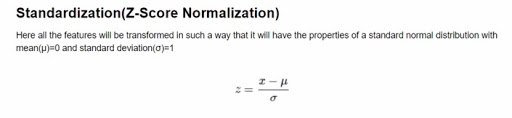

In [154]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\400.jpg')

In [63]:
#Standardize features (mainly numeric) by removing the mean and scaling to unit variance. This is necessary for Logistic Regression.

## FEATURE SCALING
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

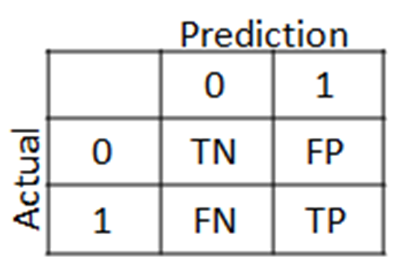

In [3]:
from IPython.display import Image
Image(filename=r'C:\Users\karth\Desktop\ML_Task\700.png')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



The accuracy of the Logistic Regression is:---->   0.8928805774278216

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5361
           1       0.66      0.23      0.34       735

    accuracy                           0.89      6096
   macro avg       0.78      0.61      0.64      6096
weighted avg       0.87      0.89      0.87      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.3437185929648241

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted     0    1   All
Actual                    
0          5272   89  5361
1           564  171   735
All        5836  260  6096

--------------------------------------OR------------------------------------------


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


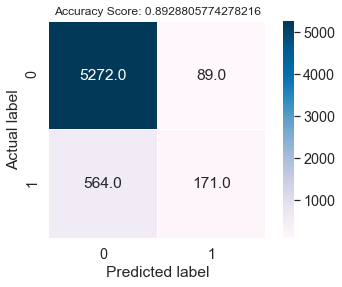


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.11

Mean Squared Error (MSE): 0.11

Root Mean Squared Error (RMSE): 0.33

--------------------------------------------------------------------------------


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

logistic = LogisticRegression(C=1,penalty='l2', verbose=5,solver="lbfgs",max_iter=100,random_state = 1)

logistic.fit(X_train, y_train)

#predictions on test data
y_pred = logistic.predict(X_test)

score_logistic = logistic.score(X_test,y_test)

print('\nThe accuracy of the Logistic Regression is:---->  ', score_logistic)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,y_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, y_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, y_pred))
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_logistic), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(logistic.predict(X_test), y_test)
mse = mean_squared_error(logistic.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

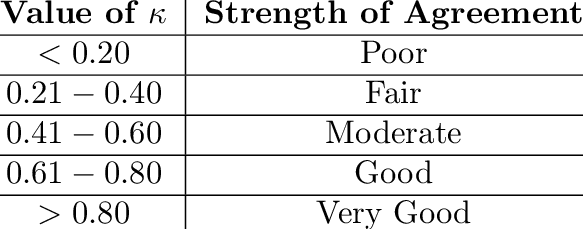

In [2]:
# Cohen Kappa Score

from IPython.display import Image
Image(filename=r'C:\Users\karth\Desktop\ML_Task\0008.png')

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, y_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, y_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, y_pred)))

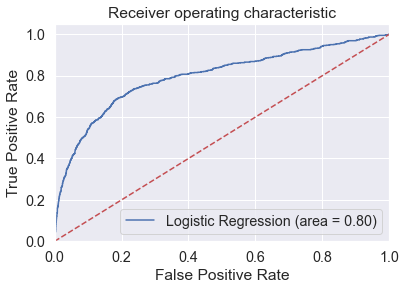

In [65]:
# AUC - ROC curve is a performance measurement for classification problem at various thresholds settings

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_proba = logistic.predict_proba(X_test)[::,1]

logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [66]:
auc_score = roc_auc_score(y_test, logistic.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.8

#### Feature Importance

In [115]:
feature_importances = pd.DataFrame(logistic.coef_[0],index = features,columns=['importance']).sort_values('importance',ascending=False)

In [116]:
feature_importances

importance
cons.price.idx                   0.643886
euribor3m                        0.230608
contact_cellular                 0.197165
cons.conf.idx                    0.146351
poutcome_success                 0.122417
has_contacted_True               0.089866
job_retired                      0.083145
job_student                      0.057710
poutcome_nonexistent             0.040631
education_university.degree      0.038453
default_no                       0.035098
job_housemaid                    0.022627
job_admin.                       0.021341
marital_single                   0.021274
job_technician                   0.020393
education_illiterate             0.019114
education_professional.course    0.011513
loan_no                          0.009529
age                              0.008870
job_self-employed                0.006886
housing_no                       0.006264
job_unemployed                   0.003039
education_basic.6y              -0.002675
job_management                  -0.006007
housing_yes                     -0.006264
marital_divorced                -0.007161
loan_yes                        -0.009529
marital_married                 -0.015238
education_high.school           -0.015713
education_basic.4y              -0.018417
job_entrepreneur                -0.019171
education_basic.9y              -0.029760
previous                        -0.032933
default_yes                     -0.035098
job_services                    -0.038887
job_blue-collar                 -0.078520
has_contacted_False             -0.089866
poutcome_failure                -0.120849
nr.employed                     -0.188751
contact_telephone               -0.197165
emp.var.rate                    -1.219141

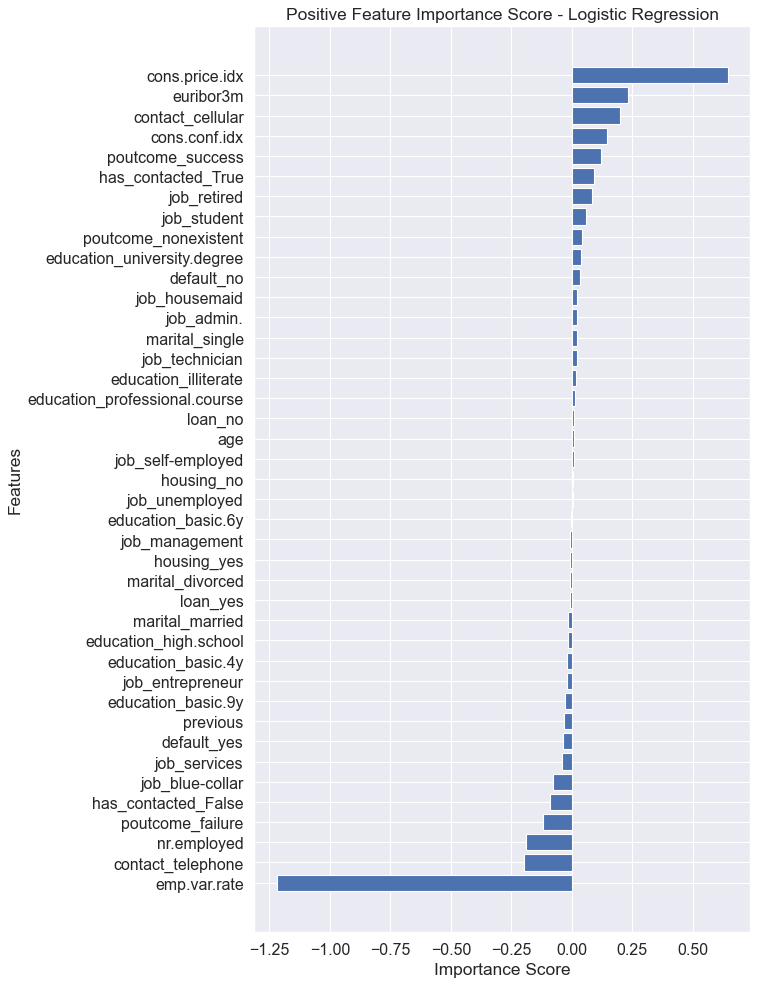

In [119]:
num = np.min([50, len(features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

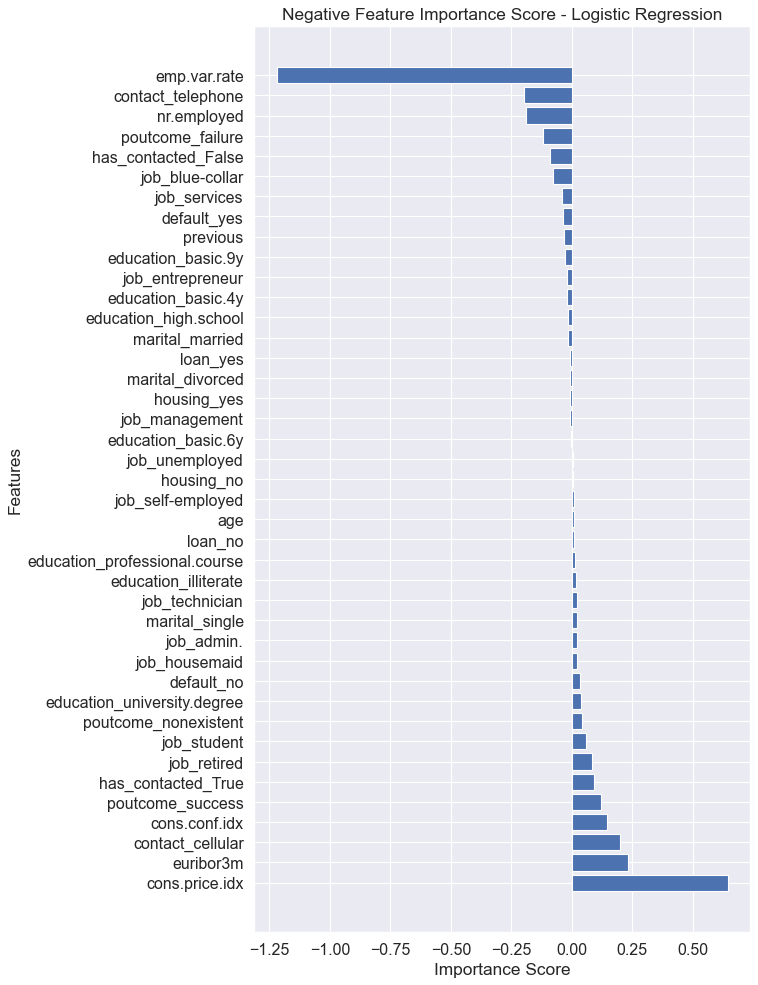

In [120]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In the case of high variance, one strategy is to reduce the number of variables to minimize overfitting. After this analyis, you could use the top N positive and negative features or the top N important random forest features. You might need to adjust N so that your performance does not drop drastically.

#### K-NEARSET NEIGHBOURS CLASSIFIER

K Nearest Neighbors looks at the k closest datapoints and probability sample that has positive labels. It is easy to implement, and you don't need an assumption for the data structure. KNN is also good for multivariate analysis.

In [67]:
# Use iteration to find out the best k value for KNN model

from sklearn.neighbors import KNeighborsClassifier

#test_scores = []
#train_scores = []

#for i in range(1,15):
    
#    knn = KNeighborsClassifier(i)
#    knn.fit(X_train,y_train)
    
#    train_scores.append(knn.score(X_train,y_train))
#    test_scores.append(knn.score(X_test,y_test))

In [68]:
# score that comes from testing on the same datapoints that were used for training

#max_train_score = max(train_scores)
#train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
#print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

In [69]:
# score that comes from testing on the datapoints that were split in the beginning to be used for testing solely

#max_test_score = max(test_scores)
#test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
#print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

In [70]:
#plt.figure(figsize=(12,5))
#p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
#p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')


The accuracy of the KNN is:---->   0.8923884514435696

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5361
           1       0.65      0.24      0.35       735

    accuracy                           0.89      6096
   macro avg       0.77      0.61      0.64      6096
weighted avg       0.87      0.89      0.87      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.34791252485089463

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted     0    1   All
Actual                    
0          5265   96  5361
1           560  175   735
All        5825  271  6096

--------------------------------------OR------------------------------------------


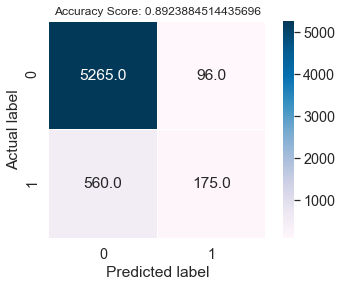


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.11

Mean Squared Error (MSE): 0.11

Root Mean Squared Error (RMSE): 0.33

--------------------------------------------------------------------------------


In [71]:
# K-Nearest Neighbors we can find best optimal k value using above code and optimal k is 14 we will get and 
# since it takes time to execute am markeing down cells

knn = KNeighborsClassifier(14)
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)

print('\nThe accuracy of the KNN is:---->  ', score_knn)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,k_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, k_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, k_pred))
print(pd.crosstab(y_test, k_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, k_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_knn), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(knn.predict(X_test), y_test)
mse = mean_squared_error(knn.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, k_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, k_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, k_pred)))

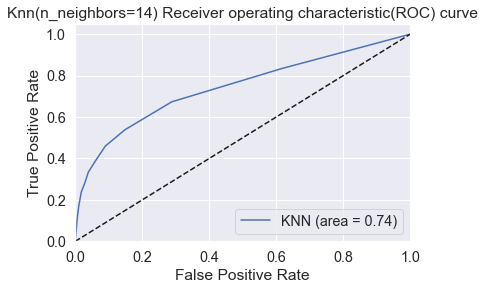

In [72]:
## ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things 
# (e.g If a custemr  subsribed term deposit  or no). Better models can accurately distinguish between the two. 
# whereas, a poor model will have difficulties in distinguishing between the two

y_pred_proba = knn.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=14) Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [73]:
auc_score = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.74

#### Naive Bayes

Naive Bayes assumes that all variables in the dataset are independent of each other. Meaning that there are no dependent variables or output. This algorithm uses Bayes rule which calculated the probability of an event related to previous knowledge of the variables concerning the event. This won't really work in this case since we have an output of the bank customers who will get a bank deposit. This process is better for tasks such as image processing.


The accuracy of the Gaussian Naive Bayes is:---->   0.13385826771653545

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.94      0.02      0.03      5361
           1       0.12      0.99      0.22       735

    accuracy                           0.13      6096
   macro avg       0.53      0.50      0.12      6096
weighted avg       0.84      0.13      0.05      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.2163846838824577

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted   0     1   All
Actual                   
0          87  5274  5361
1           6   729   735
All        93  6003  6096

--------------------------------------OR------------------------------------------


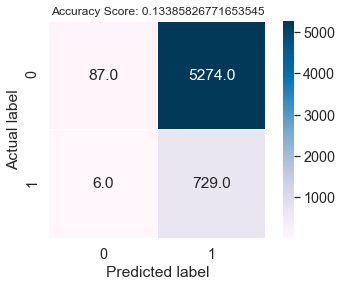


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.87

Mean Squared Error (MSE): 0.87

Root Mean Squared Error (RMSE): 0.93

--------------------------------------------------------------------------------


In [74]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
g_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)

print('\nThe accuracy of the Gaussian Naive Bayes is:---->  ', score_gaussian)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,g_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, g_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, g_pred))
print(pd.crosstab(y_test, g_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, g_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_gaussian), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(gaussian.predict(X_test), y_test)
mse = mean_squared_error(gaussian.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, g_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, g_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, g_pred)))

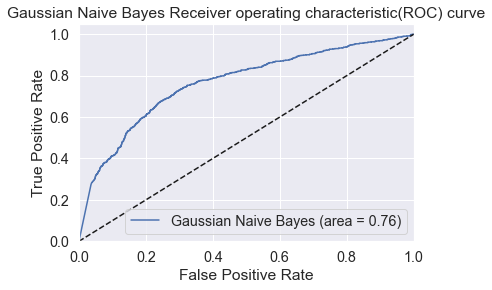

In [75]:
y_pred_proba = gaussian.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [76]:
auc_score = roc_auc_score(y_test, gaussian.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.76

#### Support Vector Classifier (SVC)


The accuracy of the SVC is:---->   0.890748031496063

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5361
           1       0.65      0.21      0.31       735

    accuracy                           0.89      6096
   macro avg       0.77      0.60      0.63      6096
weighted avg       0.87      0.89      0.86      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.3119834710743802

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted     0    1   All
Actual                    
0          5279   82  5361
1           584  151   735
All        5863  233  6096

--------------------------------------OR------------------------------------------


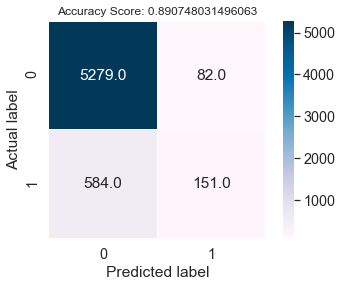


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.11

Mean Squared Error (MSE): 0.11

Root Mean Squared Error (RMSE): 0.33

--------------------------------------------------------------------------------


In [77]:
from sklearn.svm import SVC
from sklearn import svm

svc_radical =svm.SVC(kernel='rbf',gamma='scale',probability=True)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
svc_pred = svc_radical.predict(X_test)

print('\nThe accuracy of the SVC is:---->  ', score_svc_radical)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,svc_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, svc_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, svc_pred))
print(pd.crosstab(y_test, svc_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, svc_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_svc_radical), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(svc_radical.predict(X_test), y_test)
mse = mean_squared_error(svc_radical.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, svc_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, svc_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, svc_pred)))

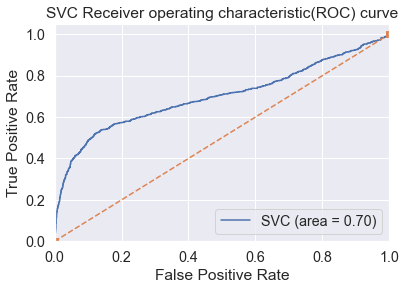

In [78]:
y_pred_proba = svc_radical.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'s--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [79]:
auc_score = roc_auc_score(y_test, svc_radical.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.7

#### DECISION TREE CLASSIFIER

Decision trees works through the data to decide if one action occurs, what will then be the result of a "yes" and a "no". It works each data making the decision of which path to take based on the answer. Because of this decision making process, this algorithm has no assumptions about the structure of the data, but instead decides on the path to take through each decision the algorithm performs.

In [80]:
from sklearn.tree import DecisionTreeClassifier
    
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(X_train,y_train)
score_dt = dt.score(X_test,y_test)
dt_pred = dt.predict(X_test)

#f1 score on test set
f1_score(y_test, dt_pred)

0.3304463690872751

**We need to do hyperparameter tuning to improve our performance. Hyper-parameters and their values vary from dataset to dataset, and their optimal values have a large impact on the performance of our model.**

#### Random Search for Hyperparameter Tuning

**In random search we will run our model only a fixed number of times, say 10, and among these 10 runs we will return the best hyper-parameter combination. This may not be the optimal hyper-parameter combination. But, it saves much more time than Grid Search, so we will go for random search.**

In [81]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

dt2 = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search = dt2.fit(X_train, y_train)

search.best_params_

{'min_samples_split': 20,
 'max_leaf_nodes': 32,
 'max_features': 0.6,
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 3}}

In [82]:
optimal_params = {'min_samples_split': 20,
 'max_leaf_nodes': 32,
 'max_features': 0.8,
 'max_depth': 8,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 3}}

dt2 = DecisionTreeClassifier(random_state = 1, **optimal_params)
dt2 = dt2.fit(X_train, y_train)
score_dt = dt2.score(X_test,y_test)
#predictions on test data
dt_pred = dt2.predict(X_test)

#f1 score on test set
f1_score(y_test, dt_pred)

0.5127919911012235

**0.512, So our performance has increased after hyperparameter tuning!**


The accuracy of the Decision Tree Classifier is:---->   0.8562992125984252

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      5361
           1       0.43      0.63      0.51       735

    accuracy                           0.86      6096
   macro avg       0.69      0.76      0.71      6096
weighted avg       0.88      0.86      0.87      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.5127919911012235

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted     0     1   All
Actual                     
0          4759   602  5361
1           274   461   735
All        5033  1063  6096

--------------------------------------OR------------------------------------------


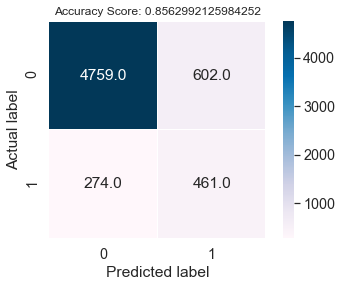


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.16

Mean Squared Error (MSE): 0.16

Root Mean Squared Error (RMSE): 0.41

--------------------------------------------------------------------------------


In [83]:
print('\nThe accuracy of the Decision Tree Classifier is:---->  ', score_dt)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,dt_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, dt_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, dt_pred))
print(pd.crosstab(y_test, dt_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, dt_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_dt), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(dt.predict(X_test), y_test)
mse = mean_squared_error(dt.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, dt_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, dt_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, dt_pred)))

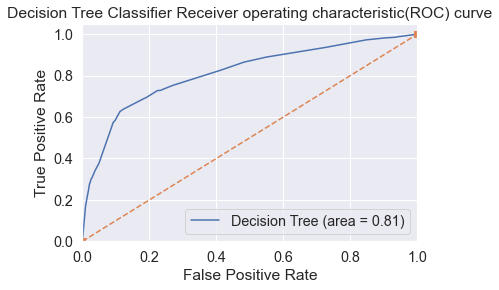

In [84]:
y_pred_proba = dt2.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'s--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [85]:
auc_score = roc_auc_score(y_test, dt2.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.81

#### Feature Importance

In [127]:
feature_importances = pd.DataFrame(dt2.feature_importances_,index = features,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head()

importance
nr.employed         0.620519
euribor3m           0.203768
cons.price.idx      0.058160
poutcome_success    0.057831
contact_cellular    0.017956

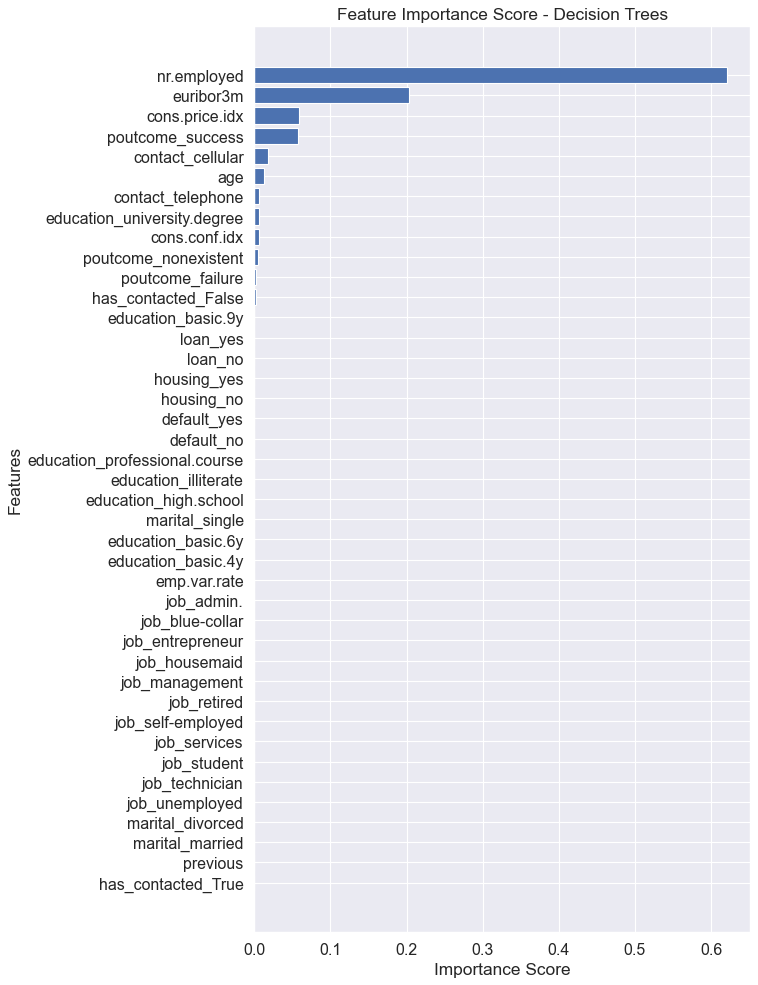

In [128]:
num = np.min([50, len(features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Decision Trees')
plt.yticks(ylocs, feature_labels)
plt.show()

#### RANDOM FOREST CLASSIFIER

Random forest works like a decision tree algorithm but it performs various decision tree analysis on the dataset as a whole. That is, it is the bigger version of the decision tree; a forest is bigger than a tree, you can think of it that way. Random forest takes random samples of trees and it works faster than the decision tree algorithm.

#### **Note:**

**No, scaling is not necessary for random forests.**

**Scaling is done to Normalize data so that priority is not given to a particular feature. Role of Scaling is mostly important in algorithms that are distance based and require Euclidean Distance.**

**Random Forest is a tree-based model and hence does not require feature scaling.**

In [86]:
from sklearn.ensemble import RandomForestClassifier
import time

rf = RandomForestClassifier(random_state=1) #by default no of estimators=10

# fit the random search model (this will take a few minutes)
t1 = time.time()
rf.fit(X_train,y_train)
t2 = time.time()
print("Time taken model to fit on data (seconds):",t2-t1)
score_rf = rf.score(X_test,y_test)
rf_pred = rf.predict(X_test)

# f1 score on test set
# F1 score is considered perfect when it's 1 , while the model is a total failure when it's 0 .
# A good F1 score means that you have low false positives and low false negatives
f1_score(y_test, rf_pred)

0.3831851253031528

##### Let's perform **hyperparameter tuning**

In [87]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


#### **https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74**

In [88]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

rf2 = RandomizedSearchCV(RandomForestClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)
t1 = time.time()
search = rf2.fit(X_train, y_train)
t2 = time.time()
print("Time taken model to fit on data (seconds):",t2-t1)
search.best_params_

{'min_samples_split': 10,
 'max_leaf_nodes': 128,
 'max_features': 0.2,
 'max_depth': 10,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 5}}

**------------OR------------**

#### **Parameters:**

**n_estimators:** int, default=100
    
    The number of trees in the forest.

**criterion:** {“gini”, “entropy”}, default=”gini”

    The function to measure the quality of a split. Supported criteria are “gini” for the Gini
    impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

**max_depth:** int, default=None

    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
    until all leaves contain less than min_samples_split samples.

**min_samples_split:** int or float, default=2

    The minimum number of samples required to split an internal node:
    ● If int, then consider min_samples_split as the minimum number.
    ● If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples)
    are the minimum number of samples for each split.

**min_samples_leaf:** int or float, default=1

    The minimum number of samples required to be at a leaf node. A split point at any depth will
    only be considered if it leaves at least min_samples_leaf training samples in each of the left
    and right branches. This may have the effect of smoothing the model, especially in
    regression.
    ● If int, then consider min_samples_leaf as the minimum number.
    ● If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples)
    are the minimum number of samples for each node.

**max_features:** {“auto”, “sqrt”, “log2”}, int or float, default=”auto”

    The number of features to consider when looking for the best split

**n_jobs:** int, default=None

    The number of jobs to run in parallel. -1 means using all processors.
    
**random_state:** int, RandomState instance or None, default=None

**class_weight:** {“balanced”, “balanced_subsample”}, dict or list of dicts, default=None

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 20)]
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 30, 40, 50, 60, 70]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ['gini', 'entropy']

max_leaf_nodes = [8, 16, 32, 64, 128, 256, 512, 1024]

class_weight = [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'criterion': criterion,
              'max_leaf_nodes': max_leaf_nodes,
              'class_weight':class_weight}

pprint(random_grid)

In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf2 = RandomForestClassifier(random_state = 1)
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf2 = RandomizedSearchCV(estimator=rf2, param_distributions=random_grid,n_iter = 100, scoring='f1',
#                           cv = 3, verbose=2, random_state=1, n_jobs=-1,return_train_score=True)

# # Fit the random search model
# t1 = time.time()
# search = rf2.fit(X_train, y_train)
# t2 = time.time()
# print("Time taken model to fit on data (seconds):",t2-t1)
# search.best_params_

In [ ]:
# optimal_params = {'bootstrap': True,
#  'class_weight': {0: 1, 1: 1},
#  'criterion': 'entropy',
#  'max_depth': 70,
#  'max_features': 'auto',
#  'max_leaf_nodes': 128,
#  'min_samples_leaf': 2,
#  'min_samples_split': 30,
#  'n_estimators': 2000}

# rf2 = RandomForestClassifier(random_state = 1, **optimal_params)
# t1 = time.time()
# rf2.fit(X_train,y_train)
# t2 = time.time()
# print("Time taken model to fit on data (seconds):",t2-t1)
# score_rf2 = rf2.score(X_test,y_test)
# rf2_pred = rf2.predict(X_test)

# #f1 score on test set
# f1_score(y_test, rf2_pred)

In [89]:
optimal_params = {'min_samples_split': 20,
 'max_leaf_nodes': 32,
 'max_features': 0.8,
 'max_depth': 10,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}


rf2 = RandomForestClassifier(random_state = 1, **optimal_params)
t1 = time.time()
rf2 = rf2.fit(X_train, y_train)
t2 = time.time()
print("Time taken model to fit on data (seconds):",t2-t1)
score_rf = rf2.score(X_test,y_test)

#predictions on test data
rf_pred = rf2.predict(X_test)

#f1 score on test set
f1_score(y_test, rf_pred)

0.5188679245283019

In [ ]:
from sklearn.metrics import recall_score, precision_score

print('Recall score     : {}'.format(recall_score(y_test, rf2_pred)))
print('Precision score  : {}'.format(precision_score(y_test, rf2_pred)))

**0.518, So our performance has increased after hyperparameter tuning!**


The accuracy of the Random Forest Classifier is:---->   0.8661417322834646

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5361
           1       0.46      0.60      0.52       735

    accuracy                           0.87      6096
   macro avg       0.70      0.75      0.72      6096
weighted avg       0.88      0.87      0.87      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.5188679245283019

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted     0    1   All
Actual                    
0          4840  521  5361
1           295  440   735
All        5135  961  6096

--------------------------------------OR------------------------------------------


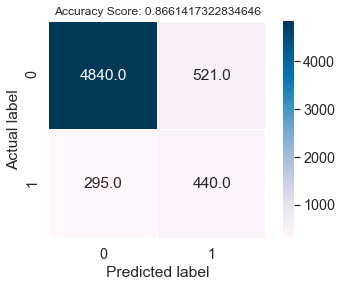


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.13

Mean Squared Error (MSE): 0.13

Root Mean Squared Error (RMSE): 0.37

--------------------------------------------------------------------------------


In [90]:
print('\nThe accuracy of the Random Forest Classifier is:---->  ', score_rf)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,rf_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, rf_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, rf_pred))
print(pd.crosstab(y_test, rf_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_rf), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(rf2.predict(X_test), y_test)
mse = mean_squared_error(rf2.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

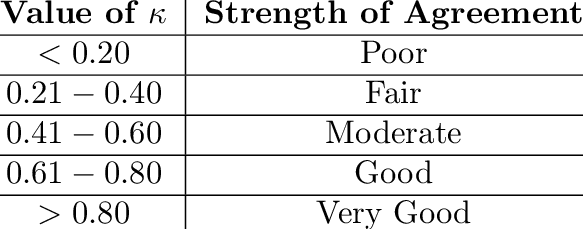

In [3]:
# Cohen Kappa Score

from IPython.display import Image
Image(filename=r'C:\Users\karth\Desktop\ML_Task\0008.png')

**Video Explanation of Precision,Recall,F1-Score: https://www.youtube.com/watch?v=2osIZ-dSPGE**

In [ ]:
from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

"""
When we have imbalanced class and we need high true positives, 
precision is prefered over recall. because precision has no false negative 
in its formula, which can impact.

Unfortunately, it is not possible to maximize both these metrics at the same time, as one comes at the cost of another.

"""

print('Recall score     : {}'.format(recall_score(y_test, rf_pred)))
print('Precision score  : {}'.format(precision_score(y_test, rf_pred)))
print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, rf_pred)))

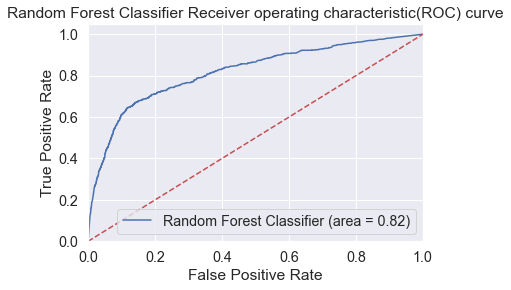

In [91]:
y_pred_proba = rf2.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [92]:
auc_score = roc_auc_score(y_test, rf2.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.82

#### Feature Importance

In [123]:
feature_importances = pd.DataFrame(rf2.feature_importances_,index = features,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head()

importance
nr.employed       0.509889
euribor3m         0.234756
cons.conf.idx     0.084691
cons.price.idx    0.027889
age               0.027038

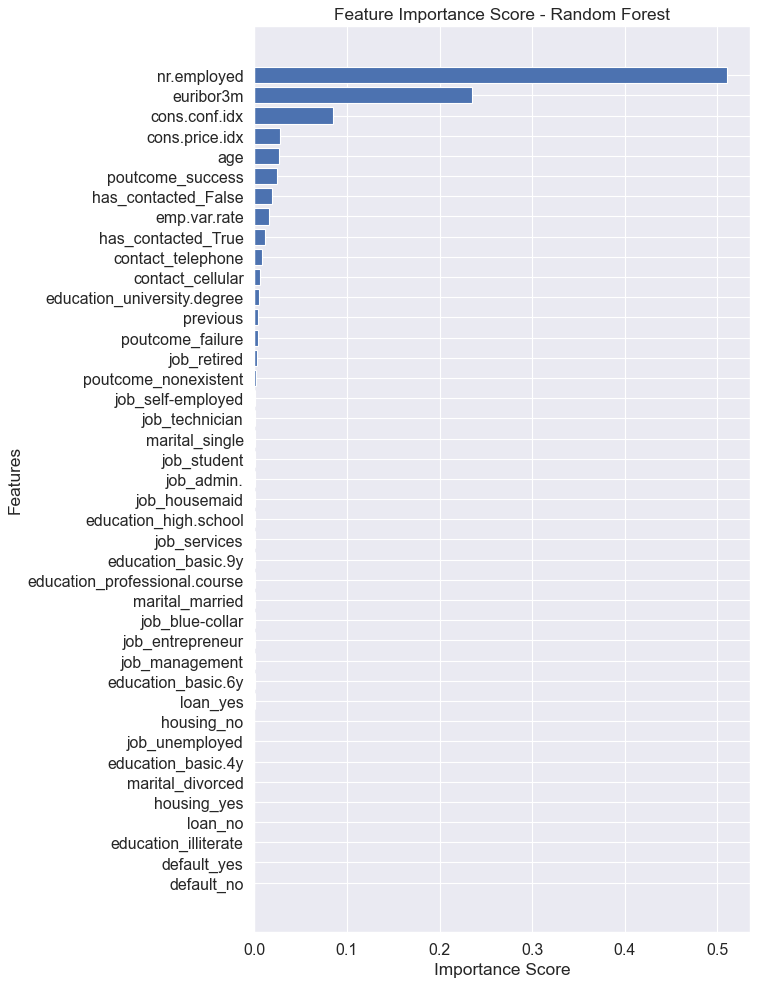

In [124]:
num = np.min([50, len(features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

**From the graph we can see that numeric features had the maximum feature importance.**

#### **Conclusion:**

In this project, we learned how to utilize Machine Learning to predict if a customer will subscribe to a bank's term deposit scheme through its marketing campaign. We found that tree based models like Decision Tree and Random Forrest are giving a good performance on this dataset. This is explainable as usually tree based models perform well when number of features are not that large. The best performing model was the hyperparameter tuned Random Forrest Model with F1 score of 0.5188 and ROC_AUC score of 0.82 on the test dataset.

In [ ]:
# The loaded model is then used to calculate the accuracy score and predict outcomes on new unseen (test) data.

# Import pickle Package

import pickle

# Save the Model to file in the current working directory

Pkl_Filename = "/home/Output/output_file_name.pkl"  

with open(Pkl_Filename, 'wb') as file: 
    pickle.dump(rf, file)

#### Pickle vs Joblib

**joblib is usually significantly faster on large numpy arrays** because it has a special handling for the array buffers of the numpy datastructure. To find about the implementation details you can have a look at the source code. It can also compress that data on the fly while pickling using zlib or lz4.

**joblib also makes it possible to memory map** the data buffer of an uncompressed joblib-pickled numpy array when loading it which makes it possible to share memory between processes.

**if you don't pickle large numpy arrays, then regular pickle can be significantly faster, especially on large collections of small python objects** (e.g. a large dict of str objects) because the pickle module of the standard library is implemented in C while joblib is pure python.

since PEP 574 (Pickle protocol 5) has been merged in Python 3.8, it is now much more efficient (memory-wise and cpu-wise) to pickle large numpy arrays using the standard library. Large arrays in this context means 4GB or more.

But **joblib can still be useful with Python 3.8 to load objects that have nested numpy arrays** in memory mapped mode with mmap_mode="r".

In [ ]:
import pickle

Pkl_Filename = "/home/Output/output_file_name.pkl"

# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_RF_Model = pickle.load(file)

Pickled_RF_Model

In [ ]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
#score = Pickled_RF_Model.score(Xtest, Ytest) 

# Print the Score
#print("Test score: {0:.2f} %".format(100 * score)) 

# Predict the Labels using the reloaded Model on unseen(new) testing data
test_RF_pred = Pickled_RF_Model.predict(testing_data)
test_RF_pred

In [ ]:
# Finally, we will save these predictions into a csv file.

submissions = pd.DataFrame()

## submissions['ID'] = test['ID']
submissions['subscribed'] = test_RF_pred

print(submissions['subscribed'])

In [ ]:
# final = testing_data.merge(submissions, left_index=True, right_index=True)
# final

In [ ]:
#Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

print(submissions['subscribed'])

In [ ]:
submissions.to_csv('/home/Output/submission_file.csv', header=True, index=False)

#### Adaboost Ensemble Algorithm


The accuracy of the AdaBoost Classifier is:---->   0.8928805774278216

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5361
           1       0.70      0.20      0.31       735

    accuracy                           0.89      6096
   macro avg       0.80      0.59      0.62      6096
weighted avg       0.88      0.89      0.87      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.30605738575982994

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted     0    1   All
Actual                    
0          5299   62  5361
1           591  144   735
All        5890  206  6096

--------------------------------------OR------------------------------------------


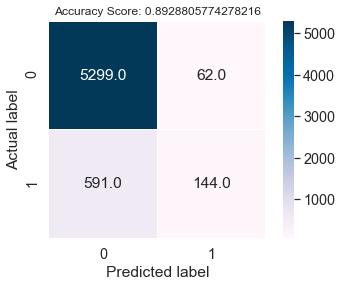


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.11

Mean Squared Error (MSE): 0.11

Root Mean Squared Error (RMSE): 0.33

--------------------------------------------------------------------------------


In [94]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
adaboost.fit(X_train,y_train)
score_adaboost = adaboost.score(X_test,y_test)
ada_pred = adaboost.predict(X_test)

print('\nThe accuracy of the AdaBoost Classifier is:---->  ', score_adaboost)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,ada_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, ada_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, ada_pred))
print(pd.crosstab(y_test, ada_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, ada_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_adaboost), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(adaboost.predict(X_test), y_test)
mse = mean_squared_error(adaboost.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, ada_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, ada_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, ada_pred)))

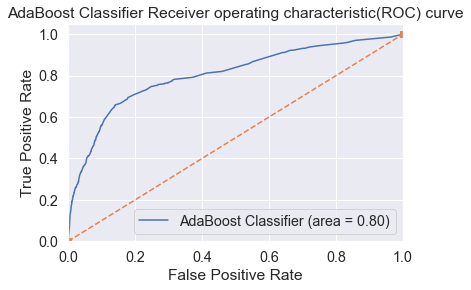

In [95]:
y_pred_proba = adaboost.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'s--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [96]:
auc_score = roc_auc_score(y_test, adaboost.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.8

#### Bagging Classifier Algorithm


The accuracy of the Bagging Classifier is:---->   0.8794291338582677

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      5361
           1       0.50      0.31      0.38       735

    accuracy                           0.88      6096
   macro avg       0.71      0.63      0.66      6096
weighted avg       0.86      0.88      0.87      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.3828715365239295

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted     0    1   All
Actual                    
0          5133  228  5361
1           507  228   735
All        5640  456  6096

--------------------------------------OR------------------------------------------


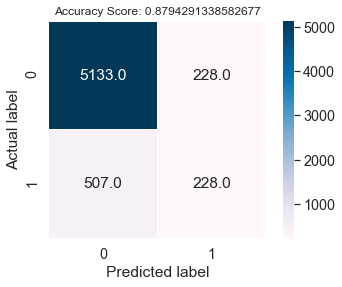


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.12

Mean Squared Error (MSE): 0.12

Root Mean Squared Error (RMSE): 0.35

--------------------------------------------------------------------------------


In [97]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bagging.fit(X_train,y_train)
score_bagging = bagging.score(X_test,y_test)
bag_pred = bagging.predict(X_test)

print('\nThe accuracy of the Bagging Classifier is:---->  ', score_bagging)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,bag_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, bag_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, bag_pred))
print(pd.crosstab(y_test, bag_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, bag_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_bagging), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(bagging.predict(X_test), y_test)
mse = mean_squared_error(bagging.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, bag_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, bag_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, bag_pred)))

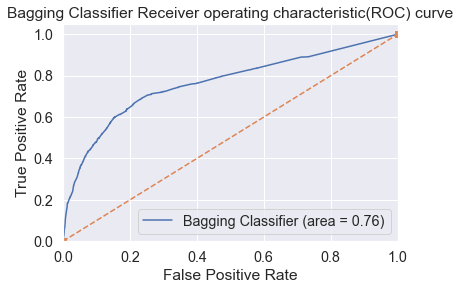

In [98]:
y_pred_proba = bagging.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Bagging Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'s--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging Classifier Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [99]:
auc_score = roc_auc_score(y_test, bagging.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.76

#### GradientBoost Classifier Algorithm


The accuracy of the Gradient Boosting Classifier is:---->   0.8918963254593176

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5361
           1       0.65      0.22      0.33       735

    accuracy                           0.89      6096
   macro avg       0.78      0.60      0.64      6096
weighted avg       0.87      0.89      0.87      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.3336703741152679

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted     0    1   All
Actual                    
0          5272   89  5361
1           570  165   735
All        5842  254  6096

--------------------------------------OR------------------------------------------


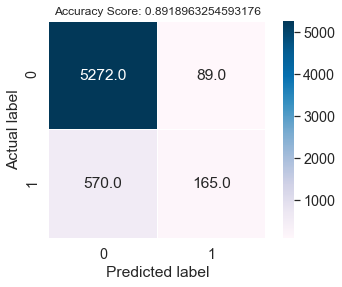


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.11

Mean Squared Error (MSE): 0.11

Root Mean Squared Error (RMSE): 0.33

--------------------------------------------------------------------------------


In [100]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboost = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gradientboost.fit(X_train,y_train)
score_gradientboost = gradientboost.score(X_test,y_test)
grad_pred = gradientboost.predict(X_test)

print('\nThe accuracy of the Gradient Boosting Classifier is:---->  ', score_gradientboost)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,grad_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, grad_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, grad_pred))
print(pd.crosstab(y_test, grad_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, grad_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_gradientboost), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(gradientboost.predict(X_test), y_test)
mse = mean_squared_error(gradientboost.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, grad_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, grad_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, grad_pred)))

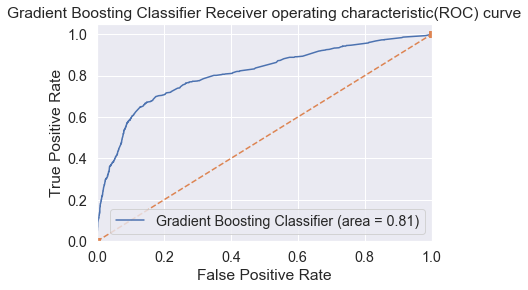

In [101]:
y_pred_proba = gradientboost.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'s--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [102]:
auc_score = roc_auc_score(y_test, gradientboost.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.81

#### Feature Importance

In [125]:
feature_importances = pd.DataFrame(gradientboost.feature_importances_,index = features,columns=['importance']).sort_values('importance',
                                                                                                                           ascending=False)
feature_importances.head()

importance
nr.employed            0.609680
cons.conf.idx          0.095737
euribor3m              0.083429
poutcome_success       0.075753
has_contacted_False    0.033289

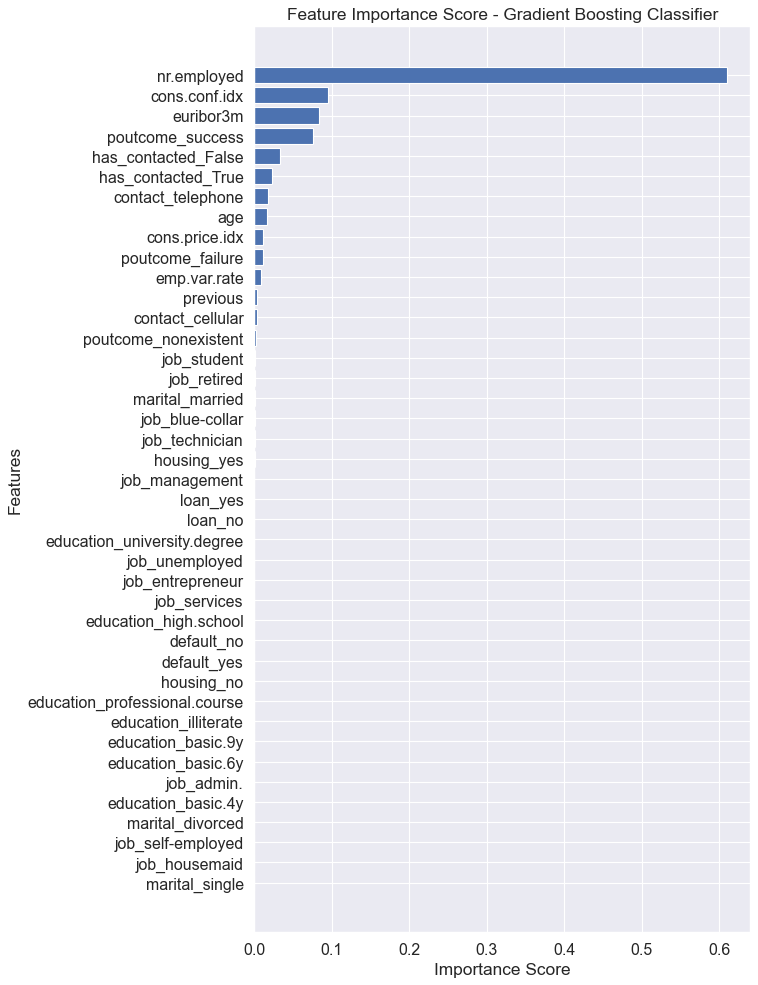

In [126]:
num = np.min([50, len(features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Gradient Boosting Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

The features that have more positive impact on the predictive outcomes of the model: euribor3m (3 month rate - daily indicator) and age are very crucial as their importance score is higher than other numerical variables.

#### Stochastic Gradient Descent

Stochastic Gradient Descent analyzes various sections of the data instead of the data as a whole and predicts the output using the independent variables. Stochastic Gradient Descent is faster than logistic regression in the sense that it doesn't run the whole dataset but instead looks at different parts of the dataset.


The accuracy of the Stocastic Gradient Descent Classifier is:---->   0.8914041994750657

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5361
           1       0.69      0.18      0.29       735

    accuracy                           0.89      6096
   macro avg       0.79      0.59      0.61      6096
weighted avg       0.87      0.89      0.86      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.2881720430107527

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted     0    1   All
Actual                    
0          5300   61  5361
1           601  134   735
All        5901  195  6096

--------------------------------------OR------------------------------------------


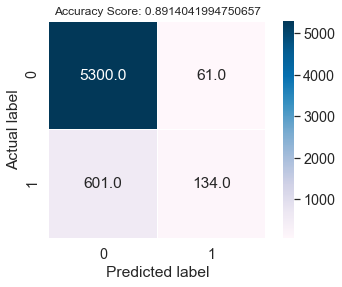


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.11

Mean Squared Error (MSE): 0.11

Root Mean Squared Error (RMSE): 0.33

--------------------------------------------------------------------------------


In [103]:
from sklearn.linear_model import SGDClassifier

sgdclassifier = SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdclassifier.fit(X_train,y_train)
score_sgdclassifier = sgdclassifier.score(X_test,y_test)
sgdc_pred = sgdclassifier.predict(X_test)

print('\nThe accuracy of the Stocastic Gradient Descent Classifier is:---->  ', score_sgdclassifier)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,sgdc_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, sgdc_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, sgdc_pred))
print(pd.crosstab(y_test, sgdc_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, sgdc_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_sgdclassifier), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(sgdclassifier.predict(X_test), y_test)
mse = mean_squared_error(sgdclassifier.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, sgdc_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, sgdc_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, sgdc_pred)))

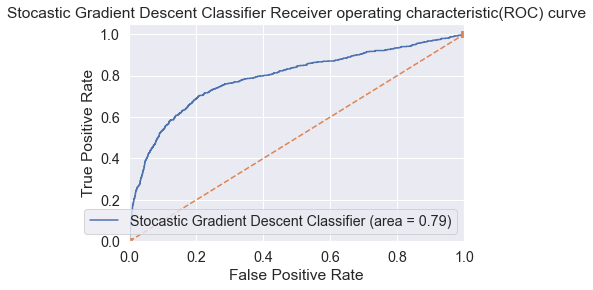

In [104]:
y_pred_proba = sgdclassifier.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Stocastic Gradient Descent Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'s--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stocastic Gradient Descent Classifier Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [105]:
auc_score = roc_auc_score(y_test, sgdclassifier.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.79

#### XGBOOST CLASSIFIER

#### **Notes:** XGBoost vs CatBoost vs LightGBM 
**https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db**

**XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradinet boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.**

**XGBoost's parameters are broken up into three categories: general, tree booster, and learning task parameters. General and learning parameters are mostly determined by what we are modelling so most of our time will be spent with the tree boost parameters. Our GBDT algorithms have common parameters and reviewing them can help us understand the different levers we can pull as data scientists to adapt to problems we come across in our models.**

#### **General Parameters:**

    Booster (default=gbtree): Type of model to run at each iteration (gbtree= tree-based, gblinear=linear model)
    
    silent (defualt=0): Set to True to aviod printing updates with each cycle.
    
    nthread (default= max available): Number of threads for parallel processing.
    
#### **Tree Booster Parameters**

    eta (default=0.3): Aliased as learning rate, typical values- 0.01-0.3
    
    min_child_weight (default=1): Defines the minimum sum of the weights of all observations required in child. Used to control overfitting, high values can lead to underfitting.
    
    max_depth (default=6): Higher depth allows learned relations very specific to a particular sample. Typical values are 3-10.
    
    gamma (default=0): Minimum loss reduction required to partition on a leaf node of a tree- the larger gamma the more conservative the algorithm.
    
    max_delta_step (default=0): Maximum delta step we allow each leaf output to be. This is generally not used but might help in logistic regression when the class is extremely imbalanced.
    
    subsample (default=1): Subsample ratio of the training instances, if 0.5 XGBoost would randomly sample half of the training data prior to growing trees, and this will prevent overfitting.
    
    colsample_bytree (default=1): Denotes the fraction of features to use.
    
    colsample_bylevel (defualt=1): Denotes the fraction of features but in terms of the level rather than tree.
    
    lambda (default=1): L2 regularization parameter.
    
    alpha (defualt=0): : L1 regularization parameter.
    
    scale_pos_weight (default=1): Controls the balance of positive and negative weights, its useful for unbalanced classes.
    
#### **Learning Task Parameters**

**These parameters define the optimization objective to be calculated at each step.**

    objective (default=linear): The loss function, logistic, softmax, and softprob (same as softmax but returns predicted probabilites not predicted classes).
    
    eval_metric (default based on objective): The metric used to validate data like: rmse, mae, logloss, error(binary classification), merror (multiclass error), mlogloss, auc (area under the curve).

In [106]:
#!pip install xgboost
from xgboost import XGBClassifier

#import xgboost as xgb
#xgb = xgb.XGBClassifier()

xgb = XGBClassifier().fit(X_train, y_train)
score_xgb = xgb.score(X_test,y_test)
xgb_pred = xgb.predict(X_test)

print('\nThe accuracy of the XGBoost Classifier is:---->  ', score_xgb)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,xgb_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, xgb_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, xgb_pred))
print(pd.crosstab(y_test, xgb_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, xgb_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_xgb), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(xgb.predict(X_test), y_test)
mse = mean_squared_error(xgb.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

ImportError: cannot import name 'XGBClassifier' from 'sklearn.ensemble' (C:\Users\karth\anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, xgb_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, xgb_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, xgb_pred)))

In [ ]:
y_pred_proba = xgb.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='XGBoost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'s--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_score = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )

#### CatBoost Classifier

**Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks.**

**Catboost introduces ordered boosting as a better gradient boosting algorithm but the greatest innovation of catboost is how it deals with categorical data. Categorical data introduces several challenges because it has to have a numerical encoding. We could use dummy variables that split the column of n categories into n columns of one-hot encoded features but this can explode our feature set. One tactic is to use target mean encoding, where we assign our category value to the mean of the target variable for that category. Catboost uses a variation on target encoding that calculates the target encoding with available history and a random permutation to encode and process our categorical data. Catboost uses the available history instead of the mean because a model running in real time would not know the true mean for its target. In training we can, of course, calculate the mean because we have all the data and this leads to target leakage where the training accuracy for our model is inflated in comparison to its accuracy in production.**

**Additional capabilities of catboost include plotting feature interactions and object (row) importance.**

#### **CatBoost Parameters**

**Several catboost parameters have aliases so keep that in mind if looking at various sources of parameter information. Catboost parameters are broken up into 8 groups, we'll be focusing on a smaller set for our optimization.**

    Common parameters (32)
    
    Overfitting detection parameters (4)
    
    Binarization parameters (2)
    
    Multiclassification parameters (1)
    
    Performance parameters (1)
    
    Processing Unit parameters (2)
    
    Output parameters (9)
    
    Ctr parameters (8)- Categorical to numerical feature encoding

#### **Important Hyperparameters**

    learning_rate (defualt=0.03): Dictates reduction in gradient step.
    
    iterations (default=1000): Max number of trees that can be built when solving machine learning problems.
    
    l2_leaf_reg (defualt=3): L2 regularization coefficient for leaf calculation, any positive values are allowed.
    
    depth (default=6): Depth of trees, like in XGB it has a high impact on accuracy and training time. It can be any integer up to 32 but a good range is 1-10.
    
    random_strength: The amount of randomness to use for scoring splits, used to avoid overfitting.
    
    bagging_temperature: Defines the settings of the Bayesian bootstrap, bootstrap_type defines the sampling of the weights, Bayesian is the defualt. If set to 1 weights are sampled from an exponential distribution, if 0 then all weights are equal to 1.
    
    border_count(default=254 for cpu, 128 for gpu): The number of splits for numerical features, integers between 1 and 255 are allowed.
    
    ctr_border_count: The number of splits for categorical features. All values are integers from 1 to 255.

In [110]:
# !pip install catboost

from catboost import CatBoostClassifier

cb = CatBoostClassifier().fit(X_train, y_train)#scale_pos_weight=2.5,subsample=0.70,learning_rate=0.075, n_estimators=1000, max_depth=5, silent=True
score_cb = cb.score(X_test,y_test)
cb_pred = cb.predict(X_test)

print('\nThe accuracy of the CatBoost Classifier is:---->  ', score_cb)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,cb_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, cb_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, cb_pred))
print(pd.crosstab(y_test, cb_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, cb_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_cb), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(cb.predict(X_test), y_test)
mse = mean_squared_error(cb.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

ModuleNotFoundError: No module named 'catboost'

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, cb_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, cb_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, cb_pred)))

In [ ]:
y_pred_proba = cb.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='CatBoost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'s--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost Classifier Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_score = roc_auc_score(y_test, cb.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )

#### LGBMClassifier

**LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).**

#### **Tree Parameters**

    max_depth: The maximum depth of the tree, this is used to handle model overfitting. If the model is overfitting lowering max_depth should be the first thing to change.
    
    min_data_in_leaf (default=20): The mininmum number of records a leaf may have, helps with overfitting. Setting it to a large value can avoid growing too deep a tree, but may cause underfitting. Setting it to hundreds or thousands is enough in a large dataset.
    
    feature_fraction: The fraction of the features randomly sampled from when building trees, a familiar parameter in GBDts.
    
    bagging_fraction: Specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.
    
    early_stopping_round: Model will stop training if the validation metric doesn't improve for consecutive rounds.
    
    lambda: Specifies regularization, typical values 0-1.
    
    min_gain_to_split: This parameter will describe the minimum gain to make a split.

#### **General Parameters**

**1. Application:**

    regression: Regression
    
    binary: Binary classification
    
    multiclass: Multiclass classification
    
**2. Boosting:**

    gdbt: Gradient Boosted Decision Tree
    
    rf: Random Forest
    
    dart: Dropouts meet multiple regression trees
    
    goss: Gradient-based One-Side Sampling
    
**3. num_boost_round: Number of boosting iterations, typically 100+**

**4. learning_rate: This determines the impact of each tree on the final outcome. Typical values 0.1, 0.001, 0.003**

**5. num_leaves (default=31): Number of leaves in full tree. This is the main parameter to control the complexity of the model. Ideally, the value of num_leaves should be less than or equal to 2^ (max_depth). Value more than this will result in overfitting.**

**6. Metric Parameter:**

    Mae

    Mse

    Binary_logloss

    Multi_logloss
    
**7. categorical_feature: It denotes the index of categorical features.**

In [111]:
#!pip install lightgbm
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()#learning_rate=0.5,n_estimators=1000, #silent=False, #random_state =94,  max_depth=5)#num_leaves=31,#objective='binary'
lgb.fit(X_train,y_train)
score_lgb = lgb.score(X_test,y_test)
lgb_pred = lgb.predict(X_test)

print('\nThe accuracy of the LGBMClassifier is:---->  ', score_lgb)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,lgb_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, lgb_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, lgb_pred))
print(pd.crosstab(y_test, lgb_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, lgb_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_lgb), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(lgb.predict(X_test), y_test)
mse = mean_squared_error(lgb.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, lgb_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, lgb_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, lgb_pred)))

In [ ]:
y_pred_proba = lgb.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='LGBM Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'s--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM Classifier Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_score = roc_auc_score(y_test, lgb.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )

______________________

#### As we observed dataset is imbalanced ,so lets try to over sample and observe results for few classification models in brief to see the difference

#### **Nice resourse on how to deal with class imbalance: https://github.com/gonzaferreiro/Dealing_with_class_imbalance** |||| **https://github.com/krishnaik06/Handle-Imbalanced-Dataset**

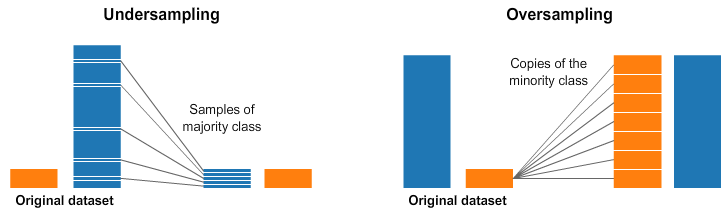

In [1]:
from IPython.display import Image
Image(filename=r'C:\Users\karth\Desktop\ML_Task\0007.png')

In [60]:
#LETS IMPORT SMOTE TO making the minority class equal to the majority class
#!pip install imblearn
#!pip install delayed 
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [61]:
train, test = train_test_split(data, test_size=0.2, random_state = 1)

#Input to our model will be the features
X_train, X_test = train[features], test[features]

#Output of our model will be the TARGET_COL
y_train, y_test = train[TARGET_COL], test[TARGET_COL]

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y.shape)

Number transactions X_train dataset:  (24382, 41)
Number transactions y_train dataset:  (24382,)
Number transactions X_test dataset:  (6096, 41)


In [62]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3123
Before OverSampling, counts of label '0': 21259 

After OverSampling, the shape of train_X: (42518, 41)
After OverSampling, the shape of train_y: (42518,) 

After OverSampling, counts of label '1': 21259
After OverSampling, counts of label '0': 21259


In [63]:
#Standardize features (mainly numeric) by removing the mean and scaling to unit variance. This is necessary for Logistic Regression.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(X_train)
X_train = scaler.transform(X_train_res)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, f1_score

parameters = {
    'C': np.linspace(1, 10, 10)
             }

lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())
clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\karth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 3.0}

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\karth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished



The accuracy of the Logistic Regression is:---->   0.5464238845144357

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.93      0.53      0.67      5361
           1       0.17      0.70      0.27       735

    accuracy                           0.55      6096
   macro avg       0.55      0.61      0.47      6096
weighted avg       0.84      0.55      0.62      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.27179352120094813

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted     0     1   All
Actual                     
0          2815  2546  5361
1           219   516   735
All        3034  3062  6096

--------------------------------------OR------------------------------------------


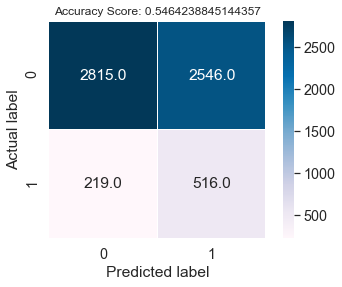


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.45

Mean Squared Error (MSE): 0.45

Root Mean Squared Error (RMSE): 0.67

--------------------------------------------------------------------------------


In [163]:
#Logistic Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

logistic = LogisticRegression(C=3,penalty='l2', verbose=5,solver="lbfgs",max_iter=100)
logistic.fit(X_train_res, y_train_res)
y_pred = logistic.predict(X_test)
score_logistic = logistic.score(X_test,y_test)

print('\nThe accuracy of the Logistic Regression is:---->  ', score_logistic)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,y_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, y_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, y_pred))
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_logistic), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(logistic.predict(X_test), y_test)
mse = mean_squared_error(logistic.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

In [ ]:
# from sklearn.metrics import cohen_kappa_score, recall_score, precision_score

# print('Recall score     : {}'.format(recall_score(y_test, y_pred)))
# print('Precision score  : {}'.format(precision_score(y_test, y_pred)))
# print('Kappa Score      : {}'.format(cohen_kappa_score(y_test, y_pred)))

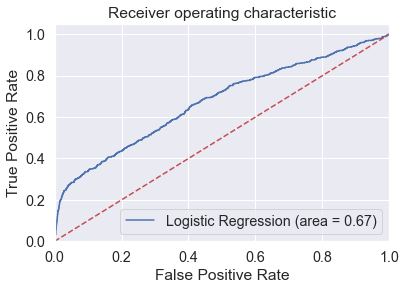

In [164]:
# AUC - ROC curve is a performance measurement for classification problem at various thresholds settings

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_proba = logistic.predict_proba(X_test)[::,1]

logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [165]:
auc_score = roc_auc_score(y_test, logistic.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.67

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.673


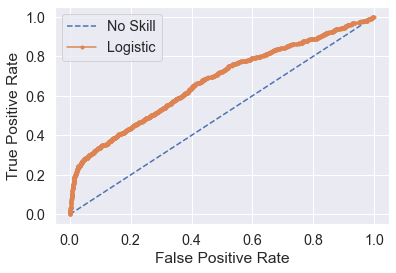

In [166]:
#ROC Curve for the model
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logistic.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [176]:
y_score = pd.DataFrame(logistic.predict_proba(X_train_res))[1]
print("ROC-AUC score on training set:", roc_auc_score(y_train_res,y_score))

y_score = pd.DataFrame(logistic.predict_proba(X_test))[1]
print("ROC-AUC score on test set:", roc_auc_score(y_test, y_score))

#score = roc_auc_score(y_test, y_pred)
#print(score)
#assert(score > 0.77)

ROC-AUC score on training set: 0.9103176100283743
ROC-AUC score on test set: 0.6729996307420562
0.6135647095995644


In [186]:
update_roc = LogisticRegression(class_weight='balanced')
update_roc.fit(X_train_res,y_train_res)

C:\Users\karth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [187]:
thr = np.where(update_roc.predict_proba(X_test)[:,1] > 0.67,1,0)

In [194]:
y_test

34910    0
8819     0
26442    0
13813    0
41036    0
        ..
1558     0
7387     0
16809    0
12863    0
9672     0
Name: y, Length: 6096, dtype: int64

In [197]:
out = pd.DataFrame(thr,y_test)

In [201]:
out.value_counts()

0    3549
1    2547
dtype: int64

In [188]:
acc_log = accuracy_score(y_test,thr)

In [189]:
print('The accuracy_score for Logistic regression using ROC curve is :',acc_log*100)

The accuracy_score for Logistic regression using ROC curve is : 60.30183727034121


#### K-Nearest Neighbors (KNN)


The accuracy of the KNN is:---->   0.12057086614173228

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5361
           1       0.12      1.00      0.22       735

    accuracy                           0.12      6096
   macro avg       0.06      0.50      0.11      6096
weighted avg       0.01      0.12      0.03      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.21519543258673696

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  


C:\Users\karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted     1   All
Actual               
0          5361  5361
1           735   735
All        6096  6096

--------------------------------------OR------------------------------------------


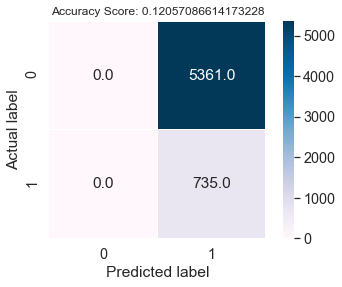


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.88

Mean Squared Error (MSE): 0.88

Root Mean Squared Error (RMSE): 0.94

--------------------------------------------------------------------------------


In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)
k_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)

print('\nThe accuracy of the KNN is:---->  ', score_knn)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,k_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, k_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, k_pred))
print(pd.crosstab(y_test, k_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, k_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_knn), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(knn.predict(X_test), y_test)
mse = mean_squared_error(knn.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

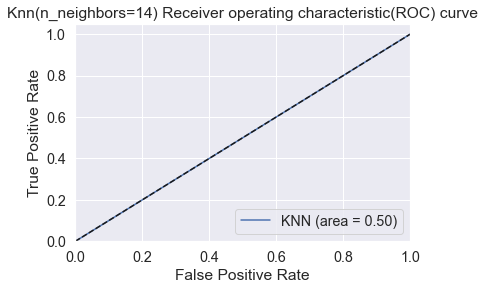

In [85]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=14) Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [86]:
auc_score = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.5

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train_res, y_train_res)
g_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)

print('\nThe accuracy of the Gaussian Naive Bayes is:---->  ', score_gaussian)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,g_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, g_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, g_pred))
print(pd.crosstab(y_test, g_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, g_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_gaussian), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(gaussian.predict(X_test), y_test)
mse = mean_squared_error(gaussian.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

In [ ]:
y_pred_proba = gaussian.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_score = roc_auc_score(y_test, gaussian.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )

#### Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

svc_radical =svm.SVC(kernel='rbf',gamma='scale')
svc_radical.fit(X_train_res,y_train_res)
score_svc_radical = svc_radical.score(X_test,Y_test)
svc_pred = svc_radical.predict(X_test)

print('\nThe accuracy of the SVC is:---->  ', score_svc_radical)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,svc_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, svc_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, svc_pred))
print(pd.crosstab(y_test, svc_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, svc_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_svc_radical), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(svc_radical.predict(X_test), y_test)
mse = mean_squared_error(svc_radical.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

In [ ]:
y_pred_proba = svc_radical.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'s--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc_score = roc_auc_score(y_test, svc_radical.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )

#### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix,classification_report

rf = RandomForestClassifier(random_state=1) #by default no of estimators=10

# fit the random search model (this will take a few minutes)
t1 = time.time()
rf.fit(X_train_res,y_train_res)
t2 = time.time()
print("Time taken model to fit on data (seconds):",t2-t1)
score_rf = rf.score(X_test,y_test)
rf_pred = rf.predict(X_test)

#f1 score on test set
f1_score(y_test, rf_pred)

Time taken model to fit on data (seconds): 2.8678085803985596


0.21105527638190955

In [68]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


#### Let's perform hyperparameter tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

rf2 = RandomizedSearchCV(RandomForestClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search = rf2.fit(X_train_res, y_train_res)

search.best_params_

{'min_samples_split': 40,
 'max_leaf_nodes': 128,
 'max_features': 0.4,
 'max_depth': 12,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}

In [72]:
optimal_params = {'min_samples_split': 40,
 'max_leaf_nodes': 128,
 'max_features': 0.4,
 'max_depth': 12,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}


rf2 = RandomForestClassifier(random_state = 1, **optimal_params)
rf2 = rf2.fit(X_train_res, y_train_res)
score_rf = rf2.score(X_test,y_test)

#predictions on test data
rf_pred = rf2.predict(X_test)

#f1 score on test set
f1_score(y_test, rf_pred)

0.21519543258673696


The accuracy of the Random Forest Classifier is:---->   0.12057086614173228

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5361
           1       0.12      1.00      0.22       735

    accuracy                           0.12      6096
   macro avg       0.06      0.50      0.11      6096
weighted avg       0.01      0.12      0.03      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.21519543258673696

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted     1   All
Actual               
0          5361  5361
1           735   735
All        6096  6096

--------------------------------------OR------------------------------------------


C:\Users\karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


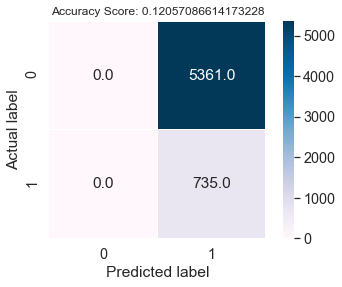


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.88

Mean Squared Error (MSE): 0.88

Root Mean Squared Error (RMSE): 0.94

--------------------------------------------------------------------------------


In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('\nThe accuracy of the Random Forest Classifier is:---->  ', score_rf)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,rf_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, rf_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, rf_pred))
print(pd.crosstab(y_test, rf_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_rf), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(rf2.predict(X_test), y_test)
mse = mean_squared_error(rf2.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

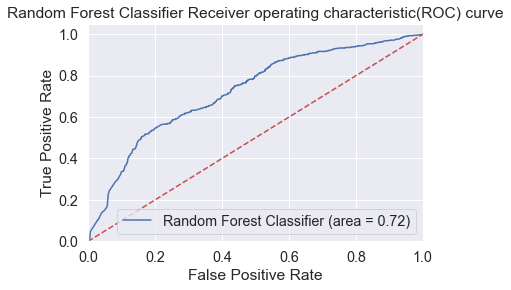

In [75]:
y_pred_proba = rf2.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [76]:
auc_score = roc_auc_score(y_test, rf2.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.72

#### Feature Importance

In [77]:
feature_importances = pd.DataFrame(rf2.feature_importances_,index = features,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head()

importance
euribor3m            0.197927
nr.employed          0.119681
emp.var.rate         0.064097
contact_telephone    0.051264
cons.conf.idx        0.046897

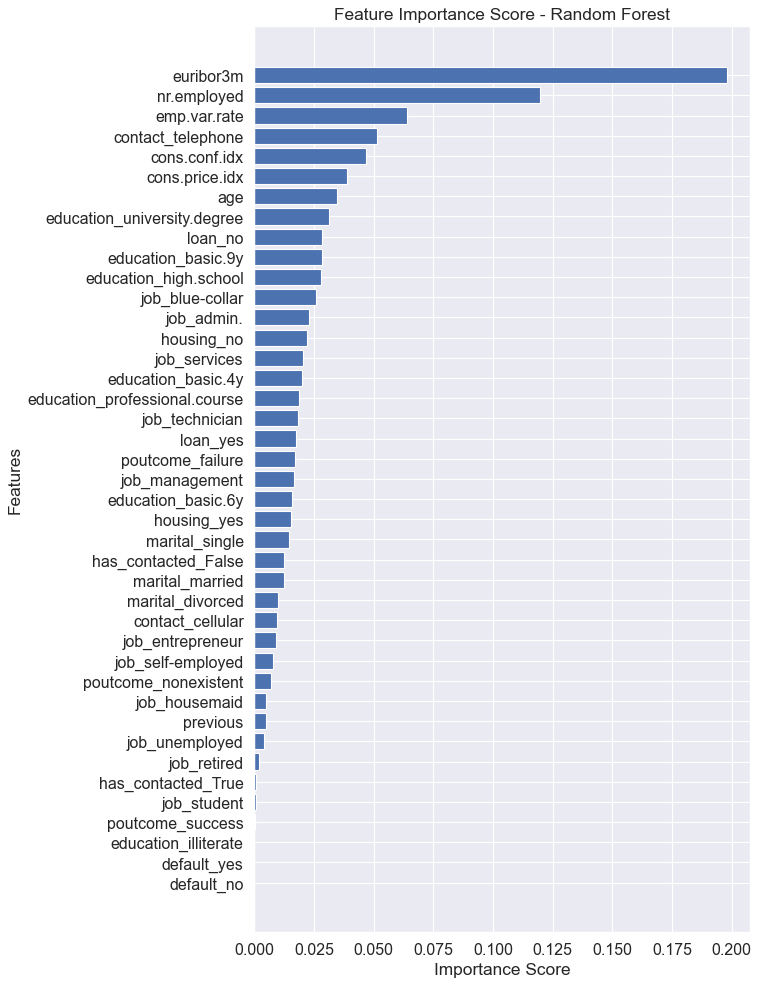

In [85]:
num = np.min([50, len(features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

In [86]:
## Droping features having threshold less than 0.01

relevant_features = feature_importances[feature_importances>0.01]
relevant_features.dropna(axis=0)

importance
euribor3m                        0.197927
nr.employed                      0.119681
emp.var.rate                     0.064097
contact_telephone                0.051264
cons.conf.idx                    0.046897
cons.price.idx                   0.038796
age                              0.034661
education_university.degree      0.031116
loan_no                          0.028418
education_basic.9y               0.028380
education_high.school            0.027871
job_blue-collar                  0.025871
job_admin.                       0.022773
housing_no                       0.022108
job_services                     0.020516
education_basic.4y               0.019823
education_professional.course    0.018727
job_technician                   0.018512
loan_yes                         0.017289
poutcome_failure                 0.017265
job_management                   0.016715
education_basic.6y               0.015906
housing_yes                      0.015446
marital_single                   0.014557
has_contacted_False              0.012345
marital_married                  0.012286

In [87]:
## Re-training Random forest model using selected features

##-----------------WITHOUT HYPERPARAMETER TUNING---------------------------

from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix,classification_report

rf3 = RandomForestClassifier(random_state=1) #by default no of estimators=10

# fit the random search model (this will take a few minutes)
t1 = time.time()
rf3.fit(X_train_res,y_train_res)
t2 = time.time()
print("Time taken model to fit on data (seconds):",t2-t1)
score_rf3 = rf3.score(X_test,y_test)
rf3_pred = rf3.predict(X_test)

#f1 score on test set
f1_score(y_test, rf3_pred)

Time taken model to fit on data (seconds): 2.9014410972595215


0.21105527638190955

In [88]:
##-----------------WITH HYPERPARAMETER TUNING---------------------------

from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

rf4 = RandomizedSearchCV(RandomForestClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search = rf4.fit(X_train_res, y_train_res)

search.best_params_

{'min_samples_split': 40,
 'max_leaf_nodes': 128,
 'max_features': 0.4,
 'max_depth': 12,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}

In [89]:
optimal_params = {'min_samples_split': 40,
 'max_leaf_nodes': 128,
 'max_features': 0.4,
 'max_depth': 12,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}


rf4 = RandomForestClassifier(random_state = 1, **optimal_params)
rf4 = rf4.fit(X_train_res, y_train_res)
score_rf4 = rf4.score(X_test,y_test)

#predictions on test data
rf4_pred = rf4.predict(X_test)

#f1 score on test set
f1_score(y_test, rf4_pred)

0.21519543258673696


The accuracy of the Random Forest Classifier is:---->   0.12057086614173228

--------------------------------------------------------------------------------

Classification Report::---->  
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5361
           1       0.12      1.00      0.22       735

    accuracy                           0.12      6096
   macro avg       0.06      0.50      0.11      6096
weighted avg       0.01      0.12      0.03      6096


--------------------------------------------------------------------------------

F1-Score is:---->  : 0.21519543258673696

--------------------------------------------------------------------------------

Confusion Matrix is: :---->  
Predicted     1   All
Actual               
0          5361  5361
1           735   735
All        6096  6096

--------------------------------------OR------------------------------------------


C:\Users\karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


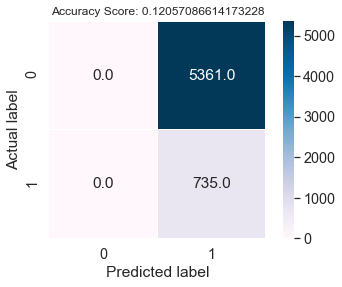


--------------------------------------------------------------------------------

ERRORS:---->  

Mean Absolute Error (MAE): 0.88

Mean Squared Error (MSE): 0.88

Root Mean Squared Error (RMSE): 0.94

--------------------------------------------------------------------------------


In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('\nThe accuracy of the Random Forest Classifier is:---->  ', score_rf4)
print("\n--------------------------------------------------------------------------------")
print("\nClassification Report::---->  ")
print(classification_report(y_test,rf4_pred))
print("\n--------------------------------------------------------------------------------")
print("\nF1-Score is:---->  :",f1_score(y_test, rf4_pred))
print("\n--------------------------------------------------------------------------------")
print("\nConfusion Matrix is: :---->  ")
#print(confusion_matrix(y_test, rf4_pred))
print(pd.crosstab(y_test, rf4_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))
print("\n--------------------------------------OR------------------------------------------")
conf_matrix = confusion_matrix(y_test, rf4_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score_rf4), size = 12)
plt.show()
print("\n--------------------------------------------------------------------------------")
print("\nERRORS:---->  ")
mae = mean_absolute_error(rf4.predict(X_test), y_test)
mse = mean_squared_error(rf4.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('\nMean Absolute Error (MAE): %.2f' % mae)
print('\nMean Squared Error (MSE): %.2f' % mse)
print('\nRoot Mean Squared Error (RMSE): %.2f' % rmse)
print("\n--------------------------------------------------------------------------------")

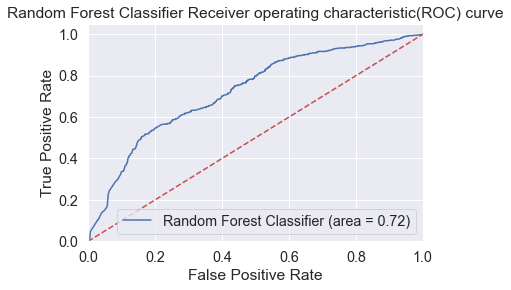

In [91]:
y_pred_proba = rf4.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier Receiver operating characteristic(ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [92]:
auc_score = roc_auc_score(y_test, rf2.predict_proba(X_test)[:,1])
print("\nAUC Score:---->  ")
round( float( auc_score ), 2 )


AUC Score:---->  


0.72

In [158]:
rf2.predict_proba((X_test))

array([[0.16636409, 0.83363591],
       [0.24840056, 0.75159944],
       [0.16511978, 0.83488022],
       ...,
       [0.08647424, 0.91352576],
       [0.10557617, 0.89442383],
       [0.19548942, 0.80451058]])

___________________

### Another way to do oversampling

#### Split the combined dataset after preprocessing into train and test sets.

We will use 80-20 split with 80% of the rows belonging to training data.

Stratified Sampling is necessary, since the dataset is highly imbalanced. 

Stratified sampling ensures that the minority class is distributed proportionally among the two classes.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix,classification_report

train, test = train_test_split(data, test_size=0.2, random_state = 1, stratify = data[TARGET_COL]) #stratified sampling
train.shape, test.shape

((24382, 42), (6096, 42))

In [63]:
#Input to our model will be the features
X_train, X_test = train[features], test[features]

#Output of our model will be the TARGET_COL
y_train, y_test = train[TARGET_COL], test[TARGET_COL]

In [64]:
print('After Sampling, the shape of train_X: {}'.format(X_train.shape))
print('After Sampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After Sampling, counts of label '1': {}".format(sum(y_train==1)))
print("After Sampling, counts of label '0': {}".format(sum(y_train==0)))

After Sampling, the shape of train_X: (24382, 41)
After Sampling, the shape of train_y: (24382,) 

After Sampling, counts of label '1': 3086
After Sampling, counts of label '0': 21296


In [65]:
#Standardize features (mainly numeric) by removing the mean and scaling to unit variance. This is necessary for Logistic Regression.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=7600,random_state = 1)
_ = lr.fit(X_train, y_train)

#predictions on test data
y_pred = lr.predict(X_test)

#f1 score on test set
f1_score(y_test, y_pred)

0.3464419475655431

_____________________________

### Another way to do oversampling

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state = 1) 
train.shape, test.shape

In [ ]:
#Input to our model will be the features
X_train, X_test = train[features], test[features]

#Output of our model will be the TARGET_COL
y_train, y_test = train[TARGET_COL], test[TARGET_COL]

#### Upsample minority class

In [ ]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

In [ ]:
print('After Sampling, the shape of train_X: {}'.format(X_train.shape))
print('After Sampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After Sampling, counts of label '1': {}".format(sum(y_train==1)))
print("After Sampling, counts of label '0': {}".format(sum(y_train==0)))

In [ ]:
#Standardize features (mainly numeric) by removing the mean and scaling to unit variance. This is necessary for Logistic Regression.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train,y_train = upSample(X_train, y_train)

lr = LogisticRegression(random_state = 42)

_ = lr.fit(X_train, y_train)

#predictions on test data
y_pred = lr.predict(X_test)

#f1 score on test set
f1_score(y_test, y_pred)

_____________________________